In [1]:
# necessary imports
import numpy as np
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [2]:
from io import StringIO

# This function creates a dataframe based on all the information passed to it in votes_string
def get_votes_as_df(votes_string, current = False):

    csv_IO = StringIO(votes_string)

    df = pd.read_csv(csv_IO, sep=",", header=None)

    if (not current):
        df = df.tail(-1)
        new_header = df.iloc[0]
        df = df.tail(-1)
        df.columns= new_header
    
    return df

In [3]:
# contains data 1976-1977 season to 2021-2022 season
votes_strings = [""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Nikola Jokić,26,DEN,65.0,875.0,1000,0.875,74,33.5,27.1,13.8,7.9,1.5,0.9,.583,.337,.810,15.2,.296,jokicni01
2,Joel Embiid,27,PHI,26.0,706.0,1000,0.706,68,33.8,30.6,11.7,4.2,1.1,1.5,.499,.371,.814,12.0,.252,embiijo01
3,Giannis Antetokounmpo,27,MIL,9.0,595.0,1000,0.595,67,32.9,29.9,11.6,5.8,1.1,1.4,.553,.293,.722,12.9,.281,antetgi01
4,Devin Booker,25,PHO,0.0,216.0,1000,0.216,68,34.5,26.8,5.0,4.8,1.1,0.4,.466,.383,.868,7.6,.156,bookede01
5,Luka Dončić,22,DAL,0.0,146.0,1000,0.146,65,35.4,28.4,9.1,8.7,1.2,0.6,.457,.353,.744,7.6,.159,doncilu01
6,Jayson Tatum,23,BOS,0.0,43.0,1000,0.043,76,35.9,26.9,8.0,4.4,1.0,0.6,.453,.353,.853,9.6,.169,tatumja01
7,Ja Morant,22,MEM,0.0,10.0,1000,0.010,57,33.1,27.4,5.7,6.7,1.2,0.4,.493,.344,.761,6.7,.171,moranja01
8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,25.5,5.2,6.3,1.3,0.4,.437,.380,.923,8.0,.173,curryst01
9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,14.7,4.4,10.8,1.9,0.3,.493,.317,.837,9.4,.210,paulch01
10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,27.9,5.2,4.9,0.9,0.3,.504,.352,.877,8.8,.154,derozde01
10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,29.9,7.4,6.4,0.9,0.9,.518,.383,.910,8.4,.198,duranke01
10T,LeBron James,37,LAL,0.0,1.0,1000,0.001,56,37.2,30.3,8.2,6.2,1.3,1.1,.524,.359,.756,7.5,.172,jamesle01""", 
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Nikola Jokić,25,DEN,91.0,971.0,1010,0.961,72,34.6,26.4,10.8,8.3,1.3,0.7,.566,.388,.868,15.6,.301,jokicni01
2,Joel Embiid,26,PHI,1.0,586.0,1010,0.580,51,31.1,28.5,10.6,2.8,1.0,1.4,.513,.377,.859,8.8,.266,embiijo01
3,Stephen Curry,32,GSW,5.0,453.0,1010,0.449,63,34.2,32.0,5.5,5.8,1.2,0.1,.482,.421,.916,9.0,.201,curryst01
4,Giannis Antetokounmpo,26,MIL,1.0,348.0,1010,0.345,61,33.0,28.1,11.0,5.9,1.2,1.2,.569,.303,.685,10.2,.244,antetgi01
5,Chris Paul,35,PHO,2.0,139.0,1010,0.138,70,31.4,16.4,4.5,8.9,1.4,0.3,.499,.395,.934,9.2,.201,paulch01
6,Luka Dončić,21,DAL,0.0,42.0,1010,0.042,66,34.3,27.7,8.0,8.6,1.0,0.5,.479,.350,.730,7.7,.163,doncilu01
7,Damian Lillard,30,POR,0.0,38.0,1010,0.038,67,35.8,28.8,4.2,7.5,0.9,0.3,.451,.391,.928,10.4,.209,lillada01
8,Julius Randle,26,NYK,0.0,20.0,1010,0.020,71,37.6,24.1,10.2,6.0,0.9,0.3,.456,.411,.811,7.8,.140,randlju01
9,Derrick Rose,32,TOT,1.0,10.0,1010,0.010,50,25.6,14.7,2.6,4.2,1.0,0.4,.470,.388,.866,3.1,.118,rosede01
10,Rudy Gobert,28,UTA,0.0,8.0,1010,0.008,71,30.8,14.3,13.5,1.3,0.6,2.7,.675,.000,.623,11.3,.248,goberru01
11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,36.4,22.2,11.5,11.7,1.4,0.4,.439,.315,.656,3.7,.075,westbru01
12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,32.4,14.3,7.2,6.9,1.6,0.6,.557,.300,.613,6.0,.153,simmobe01
13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,36.6,24.6,7.9,10.8,1.2,0.8,.466,.362,.861,7.0,.208,hardeja01
13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,33.4,25.0,7.7,7.8,1.1,0.6,.513,.365,.698,5.6,.179,jamesle01
13T,Kawhi Leonard,29,LAC,0.0,1.0,1010,0.001,52,34.1,24.8,6.5,5.2,1.6,0.4,.512,.398,.885,8.8,.238,leonaka01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Giannis Antetokounmpo,25,MIL,85.0,962.0,1010,0.952,63,30.4,29.5,13.6,5.6,1.0,1.0,.553,.304,.633,11.1,.279,antetgi01
2,LeBron James,35,LAL,16.0,753.0,1010,0.746,67,34.6,25.3,7.8,10.2,1.2,0.5,.493,.348,.693,9.8,.204,jamesle01
3,James Harden,30,HOU,0.0,367.0,1010,0.363,68,36.5,34.3,6.6,7.5,1.8,0.9,.444,.355,.865,13.1,.254,hardeja01
4,Luka Dončić,20,DAL,0.0,200.0,1010,0.198,61,33.6,28.8,9.4,8.8,1.0,0.2,.463,.316,.758,8.8,.207,doncilu01
5,Kawhi Leonard,28,LAC,0.0,168.0,1010,0.166,57,32.4,27.1,7.1,4.9,1.8,0.6,.470,.378,.886,8.7,.226,leonaka01
6,Anthony Davis,26,LAL,0.0,82.0,1010,0.081,62,34.4,26.1,9.3,3.2,1.5,2.3,.503,.330,.846,11.1,.250,davisan02
7,Chris Paul,34,OKC,0.0,26.0,1010,0.026,70,31.5,17.6,5.0,6.7,1.6,0.2,.489,.365,.907,8.9,.193,paulch01
8,Damian Lillard,29,POR,0.0,23.0,1010,0.023,66,37.5,30.0,4.3,8.0,1.1,0.3,.463,.401,.888,11.6,.225,lillada01
9,Nikola Jokić,24,DEN,0.0,18.0,1010,0.018,73,32.0,19.9,9.7,7.0,1.2,0.6,.528,.314,.817,9.8,.202,jokicni01
10,Pascal Siakam,25,TOR,0.0,17.0,1010,0.017,60,35.2,22.9,7.3,3.5,1.0,0.9,.453,.359,.792,5.4,.123,siakapa01
11,Jimmy Butler,30,MIA,0.0,9.0,1010,0.009,58,33.8,19.9,6.7,6.0,1.8,0.6,.455,.244,.834,9.0,.221,butleji01
12,Jayson Tatum,21,BOS,0.0,1.0,1010,0.001,66,34.3,23.4,7.0,3.0,1.4,0.9,.450,.403,.812,6.9,.146,tatumja01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Giannis Antetokounmpo,24,MIL,78.0,941.0,1010,0.932,72,32.8,27.7,12.5,5.9,1.3,1.5,.578,.256,.729,14.4,.292,antetgi01
2,James Harden,29,HOU,23.0,776.0,1010,0.768,78,36.8,36.1,6.6,7.5,2.0,0.7,.442,.368,.879,15.2,.254,hardeja01
3,Paul George,28,OKC,0.0,356.0,1010,0.352,77,36.9,28.0,8.2,4.1,2.2,0.4,.438,.386,.839,11.9,.201,georgpa01
4,Nikola Jokić,23,DEN,0.0,212.0,1010,0.210,80,31.3,20.1,10.8,7.3,1.4,0.7,.511,.307,.821,11.8,.226,jokicni01
5,Stephen Curry,30,GSW,0.0,175.0,1010,0.173,69,33.8,27.3,5.3,5.2,1.3,0.4,.472,.437,.916,9.7,.199,curryst01
6,Damian Lillard,28,POR,0.0,69.0,1010,0.068,80,35.5,25.8,4.6,6.9,1.1,0.4,.444,.369,.912,12.1,.205,lillada01
7,Joel Embiid,24,PHI,0.0,49.0,1010,0.049,64,33.7,27.5,13.6,3.7,0.7,1.9,.484,.300,.804,8.7,.194,embiijo01
8,Kevin Durant,30,GSW,0.0,25.0,1010,0.025,78,34.6,26.0,6.4,5.9,0.7,1.1,.521,.353,.885,11.5,.204,duranke01
9,Kawhi Leonard,27,TOR,0.0,13.0,1010,0.013,60,34.0,26.6,7.3,3.3,1.8,0.4,.496,.371,.854,9.5,.224,leonaka01
10,Russell Westbrook,30,OKC,0.0,8.0,1010,0.008,73,36.0,22.9,11.1,10.7,1.9,0.5,.428,.290,.656,6.8,.124,westbru01
11T,Rudy Gobert,26,UTA,0.0,1.0,1010,0.001,81,31.8,15.9,12.9,2.0,0.8,2.3,.669,,.636,14.4,.268,goberru01
11T,LeBron James,34,LAL,0.0,1.0,1010,0.001,55,35.2,27.4,8.5,8.3,1.3,0.6,.510,.339,.665,7.2,.179,jamesle01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,James Harden,28,HOU,86.0,965.0,1010,0.955,72,35.4,30.4,5.4,8.8,1.8,0.7,.449,.367,.858,15.4,.289,hardeja01
2,LeBron James,33,CLE,15.0,738.0,1010,0.731,82,36.9,27.5,8.6,9.1,1.4,0.9,.542,.367,.731,14.0,.221,jamesle01
3,Anthony Davis,24,NOP,0.0,445.0,1010,0.441,75,36.4,28.1,11.1,2.3,1.5,2.6,.534,.340,.828,13.7,.241,davisan02
4,Damian Lillard,27,POR,0.0,207.0,1010,0.205,73,36.6,26.9,4.5,6.6,1.1,0.4,.439,.361,.916,12.6,.227,lillada01
5,Russell Westbrook,29,OKC,0.0,76.0,1010,0.075,80,36.4,25.4,10.1,10.3,1.8,0.3,.449,.298,.737,10.1,.166,westbru01
6,Giannis Antetokounmpo,23,MIL,0.0,75.0,1010,0.074,75,36.7,26.9,10.0,4.8,1.5,1.4,.529,.307,.760,11.9,.207,antetgi01
7,Kevin Durant,29,GSW,0.0,66.0,1010,0.065,68,34.2,26.4,6.8,5.4,0.7,1.8,.516,.419,.889,10.4,.215,duranke01
8,DeMar DeRozan,28,TOR,0.0,32.0,1010,0.032,80,33.9,23.0,3.9,5.2,1.1,0.3,.456,.310,.825,9.6,.170,derozde01
9,LaMarcus Aldridge,32,SAS,0.0,6.0,1010,0.006,75,33.5,23.1,8.5,2.0,0.6,1.2,.510,.293,.837,10.9,.209,aldrila01
10T,Jimmy Butler,28,MIN,0.0,5.0,1010,0.005,59,36.7,22.2,5.3,4.9,2.0,0.4,.474,.350,.854,8.9,.198,butleji01
10T,Stephen Curry,29,GSW,0.0,5.0,1010,0.005,51,32.0,26.4,5.1,6.1,1.6,0.2,.495,.423,.921,9.1,.267,curryst01
12,Joel Embiid,23,PHI,0.0,4.0,1010,0.004,63,30.3,22.9,11.0,3.2,0.6,1.8,.483,.308,.769,6.2,.155,embiijo01
13,Victor Oladipo,25,IND,0.0,2.0,1010,0.002,75,34.0,23.1,5.2,4.3,2.4,0.8,.477,.371,.799,8.2,.155,oladivi01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Russell Westbrook,28,OKC,69.0,888.0,1010,0.879,81,34.6,31.6,10.7,10.4,1.6,0.4,.425,.343,.845,13.1,.224,westbru01
2,James Harden,27,HOU,22.0,753.0,1010,0.746,81,36.4,29.1,8.1,11.2,1.5,0.5,.440,.347,.847,15.0,.245,hardeja01
3,Kawhi Leonard,25,SAS,9.0,500.0,1010,0.495,74,33.4,25.5,5.8,3.5,1.8,0.7,.485,.380,.880,13.6,.264,leonaka01
4,LeBron James,32,CLE,1.0,333.0,1010,0.330,74,37.8,26.4,8.6,8.7,1.2,0.6,.548,.363,.674,12.9,.221,jamesle01
5,Isaiah Thomas,27,BOS,0.0,81.0,1010,0.080,76,33.8,28.9,2.7,5.9,0.9,0.2,.463,.379,.909,12.5,.234,thomais02
6,Stephen Curry,28,GSW,0.0,52.0,1010,0.051,79,33.4,25.3,4.5,6.6,1.8,0.2,.468,.411,.898,12.6,.229,curryst01
7T,Giannis Antetokounmpo,22,MIL,0.0,7.0,1010,0.007,80,35.6,22.9,8.8,5.4,1.6,1.9,.521,.272,.770,12.4,.210,antetgi01
7T,John Wall,26,WAS,0.0,7.0,1010,0.007,78,36.4,23.1,4.2,10.7,2.0,0.6,.451,.327,.801,8.8,.149,walljo01
9T,Anthony Davis,23,NOP,0.0,2.0,1010,0.002,75,36.1,28.0,11.8,2.1,1.3,2.2,.505,.299,.802,11.0,.195,davisan02
9T,Kevin Durant,28,GSW,0.0,2.0,1010,0.002,62,33.4,25.1,8.3,4.8,1.1,1.6,.537,.375,.875,12.0,.278,duranke01
11,DeMar DeRozan,27,TOR,0.0,1.0,1010,0.001,74,35.4,27.3,5.2,3.9,1.1,0.2,.467,.266,.842,9.0,.166,derozde01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Stephen Curry,27,GSW,131.0,1310.0,1310,1.000,79,34.2,30.1,5.4,6.7,2.1,0.2,.504,.454,.908,17.9,.318,curryst01
2,Kawhi Leonard,24,SAS,0.0,634.0,1310,0.484,72,33.1,21.2,6.8,2.6,1.8,1.0,.506,.443,.874,13.7,.277,leonaka01
3,LeBron James,31,CLE,0.0,631.0,1310,0.482,76,35.6,25.3,7.4,6.8,1.4,0.6,.520,.309,.731,13.6,.242,jamesle01
4,Russell Westbrook,27,OKC,0.0,486.0,1310,0.371,80,34.4,23.5,7.8,10.4,2.0,0.3,.454,.296,.812,14.0,.245,westbru01
5,Kevin Durant,27,OKC,0.0,147.0,1310,0.112,72,35.8,28.2,8.2,5.0,1.0,1.2,.505,.387,.898,14.5,.270,duranke01
6,Chris Paul,30,LAC,0.0,107.0,1310,0.082,74,32.7,19.5,4.2,10.0,2.1,0.2,.462,.371,.896,12.7,.253,paulch01
7,Draymond Green,25,GSW,0.0,50.0,1310,0.038,81,34.7,14.0,9.5,7.4,1.5,1.4,.490,.388,.696,11.1,.190,greendr01
8,Damian Lillard,25,POR,0.0,26.0,1310,0.020,75,35.7,25.1,4.0,6.8,0.9,0.4,.419,.375,.892,9.2,.165,lillada01
9,James Harden,26,HOU,0.0,9.0,1310,0.007,82,38.1,29.0,6.1,7.5,1.7,0.6,.439,.359,.860,13.3,.204,hardeja01
10,Kyle Lowry,29,TOR,0.0,6.0,1310,0.005,77,37.0,21.2,4.7,6.4,2.1,0.4,.427,.388,.811,11.6,.196,lowryky01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Stephen Curry,26,GSW,100.0,1198.0,1300,0.922,80,32.7,23.8,4.3,7.7,2.0,0.2,.487,.443,.914,15.7,.288,curryst01
2,James Harden,25,HOU,25.0,936.0,1300,0.720,81,36.8,27.4,5.7,7.0,1.9,0.7,.440,.375,.868,16.4,.265,hardeja01
3,LeBron James,30,CLE,5.0,552.0,1300,0.425,69,36.1,25.3,6.0,7.4,1.6,0.7,.488,.354,.710,10.4,.199,jamesle01
4,Russell Westbrook,26,OKC,0.0,352.0,1300,0.271,67,34.4,28.1,7.3,8.6,2.1,0.2,.426,.299,.835,10.6,.222,westbru01
5,Anthony Davis,21,NOP,0.0,203.0,1300,0.156,68,36.1,24.4,10.2,2.2,1.5,2.9,.535,.083,.805,14.0,.274,davisan02
6,Chris Paul,29,LAC,0.0,124.0,1300,0.095,82,34.8,19.1,4.6,10.2,1.9,0.2,.485,.398,.900,16.1,.270,paulch01
7,LaMarcus Aldridge,29,POR,0.0,6.0,1300,0.005,71,35.4,23.4,10.2,1.7,0.7,1.0,.466,.352,.845,8.6,.165,aldrila01
8T,Marc Gasol,30,MEM,0.0,3.0,1300,0.002,81,33.2,17.4,7.8,3.8,0.9,1.6,.494,.176,.795,10.2,.182,gasolma01
8T,Blake Griffin,25,LAC,0.0,3.0,1300,0.002,67,35.2,21.9,7.6,5.3,0.9,0.5,.502,.400,.728,9.0,.183,griffbl01
10T,Tim Duncan,38,SAS,0.0,1.0,1300,0.001,77,28.9,13.9,9.1,3.0,0.8,2.0,.512,.286,.740,9.6,.207,duncati01
10T,Kawhi Leonard,23,SAS,0.0,1.0,1300,0.001,64,31.8,16.5,7.2,2.5,2.3,0.8,.479,.349,.802,8.6,.204,leonaka01
10T,Klay Thompson,24,GSW,0.0,1.0,1300,0.001,77,31.9,21.7,3.2,2.9,1.1,0.8,.463,.439,.879,8.8,.172,thompkl01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Kevin Durant,25,OKC,119.0,1232.0,1250,0.986,81,38.5,32.0,7.4,5.5,1.3,0.7,.503,.391,.873,19.2,.295,duranke01
2,LeBron James,29,MIA,6.0,891.0,1250,0.713,77,37.7,27.1,6.9,6.3,1.6,0.3,.567,.379,.750,15.9,.264,jamesle01
3,Blake Griffin,24,LAC,0.0,434.0,1250,0.347,80,35.8,24.1,9.5,3.9,1.2,0.6,.528,.273,.715,12.2,.205,griffbl01
4,Joakim Noah,28,CHI,0.0,322.0,1250,0.258,80,35.3,12.6,11.3,5.4,1.2,1.5,.475,.000,.737,11.2,.190,noahjo01
5,James Harden,24,HOU,0.0,85.0,1250,0.068,73,38.0,25.4,4.7,6.1,1.6,0.4,.456,.366,.866,12.8,.221,hardeja01
6,Stephen Curry,25,GSW,0.0,66.0,1250,0.053,78,36.5,24.0,4.3,8.5,1.6,0.2,.471,.424,.885,13.4,.225,curryst01
7,Chris Paul,28,LAC,0.0,45.0,1250,0.036,62,35.0,19.1,4.3,10.7,2.5,0.1,.467,.368,.855,12.2,.270,paulch01
8,Al Jefferson,29,CHA,0.0,34.0,1250,0.027,73,35.0,21.8,10.8,2.1,0.9,1.1,.509,.200,.690,7.8,.146,jeffeal01
9,Paul George,23,IND,0.0,33.0,1250,0.026,80,36.2,21.7,6.8,3.5,1.9,0.3,.424,.364,.864,10.8,.178,georgpa01
10,LaMarcus Aldridge,28,POR,0.0,26.0,1250,0.021,69,36.2,23.2,11.1,2.6,0.9,1.0,.458,.200,.822,7.5,.144,aldrila01
11,Kevin Love,25,MIN,0.0,25.0,1250,0.020,77,36.3,26.1,12.5,4.4,0.8,0.5,.457,.376,.821,14.3,.245,loveke01
12T,Tim Duncan,37,SAS,0.0,21.0,1250,0.017,74,29.2,15.1,9.7,3.0,0.6,1.9,.490,.000,.731,7.4,.164,duncati01
12T,Tony Parker,31,SAS,0.0,21.0,1250,0.017,68,29.4,16.7,2.3,5.7,0.5,0.1,.499,.373,.811,5.9,.141,parketo01
14,Dirk Nowitzki,35,DAL,0.0,7.0,1250,0.006,80,32.9,21.7,6.2,2.7,0.9,0.6,.497,.398,.899,10.9,.199,nowitdi01
15,Carmelo Anthony,29,NYK,0.0,4.0,1250,0.003,77,38.7,27.4,8.1,3.1,1.2,0.7,.452,.402,.848,10.7,.172,anthoca01
16,Goran Dragić,27,PHO,0.0,3.0,1250,0.002,76,35.1,20.3,3.2,5.9,1.4,0.3,.505,.408,.760,10.3,.186,dragigo01
17,Mike Conley,26,MEM,0.0,1.0,1250,0.001,73,33.5,17.2,2.9,6.0,1.5,0.2,.450,.361,.815,8.2,.161,conlemi01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,LeBron James,28,MIA,120.0,1207.0,1210,0.998,76,37.9,26.8,8.0,7.3,1.7,0.9,.565,.406,.753,19.3,.322,jamesle01
2,Kevin Durant,24,OKC,0.0,765.0,1210,0.632,81,38.5,28.1,7.9,4.6,1.4,1.3,.510,.416,.905,18.9,.291,duranke01
3,Carmelo Anthony,28,NYK,1.0,475.0,1210,0.393,67,37.0,28.7,6.9,2.6,0.8,0.5,.449,.379,.830,9.5,.184,anthoca01
4,Chris Paul,27,LAC,0.0,289.0,1210,0.239,70,33.4,16.9,3.7,9.7,2.4,0.1,.481,.328,.885,13.9,.287,paulch01
5,Kobe Bryant,34,LAL,0.0,184.0,1210,0.152,78,38.6,27.3,5.6,6.0,1.4,0.3,.463,.324,.839,10.9,.174,bryanko01
6,Tony Parker,30,SAS,0.0,86.0,1210,0.071,66,32.9,20.3,3.0,7.6,0.8,0.1,.522,.353,.845,9.3,.206,parketo01
7,Tim Duncan,36,SAS,0.0,65.0,1210,0.054,69,30.1,17.8,9.9,2.7,0.7,2.7,.502,.286,.817,8.3,.191,duncati01
8,James Harden,23,HOU,0.0,33.0,1210,0.027,78,38.3,25.9,4.9,5.8,1.8,0.5,.438,.368,.851,12.8,.206,hardeja01
9,Russell Westbrook,24,OKC,0.0,9.0,1210,0.007,82,34.9,23.2,5.2,7.4,1.8,0.3,.438,.323,.800,11.6,.195,westbru01
10,Dwyane Wade,31,MIA,0.0,5.0,1210,0.004,69,34.7,21.2,5.0,5.1,1.9,0.8,.521,.258,.725,9.6,.192,wadedw01
11,Stephen Curry,24,GSW,0.0,3.0,1210,0.002,78,38.2,22.9,4.0,6.9,1.6,0.2,.451,.453,.900,11.2,.180,curryst01
12T,Kevin Garnett,36,BOS,0.0,1.0,1210,0.001,68,29.7,14.8,7.8,2.3,1.1,0.9,.496,.125,.786,5.6,.133,garneke01
12T,Marc Gasol,28,MEM,0.0,1.0,1210,0.001,80,35.0,14.1,7.8,4.0,1.0,1.7,.494,.071,.848,11.5,.197,gasolma01
12T,Ty Lawson,25,DEN,0.0,1.0,1210,0.001,73,34.4,16.7,2.7,6.9,1.5,0.1,.461,.366,.756,7.4,.141,lawsoty01
12T,David Lee,29,GSW,0.0,1.0,1210,0.001,79,36.8,18.5,11.2,3.5,0.8,0.3,.519,.000,.797,9.1,.150,leeda02
12T,Joakim Noah,27,CHI,0.0,1.0,1210,0.001,66,36.8,11.9,11.1,4.0,1.2,2.1,.481,.000,.751,7.3,.145,noahjo01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,LeBron James,27,MIA,85.0,1074.0,1210,0.888,62,37.5,27.1,7.9,6.2,1.9,0.8,.531,.362,.771,14.5,.298,jamesle01
2,Kevin Durant,23,OKC,24.0,889.0,1210,0.735,66,38.6,28.0,8.0,3.5,1.3,1.2,.496,.387,.860,12.2,.230,duranke01
3,Chris Paul,26,LAC,6.0,385.0,1210,0.318,60,36.4,19.8,3.6,9.1,2.5,0.1,.478,.371,.861,12.7,.278,paulch01
4,Kobe Bryant,33,LAL,2.0,352.0,1210,0.291,58,38.5,27.9,5.4,4.6,1.2,0.3,.430,.303,.845,6.2,.132,bryanko01
5,Tony Parker,29,SAS,4.0,331.0,1210,0.274,60,32.1,18.3,2.9,7.7,1.0,0.1,.480,.230,.799,7.1,.177,parketo01
6,Kevin Love,23,MIN,0.0,58.0,1210,0.048,55,39.0,26.0,13.3,2.0,0.9,0.5,.448,.372,.824,10.0,.223,loveke01
7,Dwight Howard,26,ORL,0.0,13.0,1210,0.011,54,38.3,20.6,14.5,1.9,1.5,2.1,.573,.000,.491,7.7,.179,howardw01
8,Rajon Rondo,25,BOS,0.0,12.0,1210,0.010,53,36.9,11.9,4.8,11.7,1.8,0.1,.448,.238,.597,4.9,.121,rondora01
9,Steve Nash,37,PHO,0.0,7.0,1210,0.006,62,31.6,12.5,3.0,10.7,0.6,0.1,.532,.390,.894,5.9,.144,nashst01
10,Dwyane Wade,30,MIA,0.0,6.0,1210,0.005,49,33.2,22.1,4.8,4.6,1.7,1.3,.497,.268,.791,7.7,.227,wadedw01
11,Derrick Rose,23,CHI,0.0,5.0,1210,0.004,39,35.3,21.8,3.4,7.9,0.9,0.7,.435,.312,.812,6.0,.211,rosede01
12T,Dirk Nowitzki,33,DAL,0.0,4.0,1210,0.003,62,33.5,21.6,6.7,2.2,0.7,0.5,.457,.368,.896,7.6,.175,nowitdi01
12T,Russell Westbrook,23,OKC,0.0,4.0,1210,0.003,66,35.3,23.6,4.6,5.5,1.7,0.3,.457,.316,.823,7.9,.163,westbru01
14,Tim Duncan,35,SAS,0.0,3.0,1210,0.002,58,28.2,15.4,9.0,2.3,0.7,1.5,.492,.000,.695,5.9,.174,duncati01
15,Joe Johnson,30,ATL,0.0,1.0,1210,0.001,60,35.5,18.8,3.7,3.9,0.8,0.2,.454,.388,.849,6.4,.145,johnsjo02""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Derrick Rose,22,CHI,113.0,1182.0,1210,0.977,81,37.4,25.0,4.1,7.7,1.0,0.6,.445,.332,.858,13.1,.208,rosede01
2,Dwight Howard,25,ORL,3.0,643.0,1210,0.531,78,37.6,22.9,14.1,1.4,1.4,2.4,.593,.000,.596,14.4,.235,howardw01
3,LeBron James,26,MIA,4.0,522.0,1210,0.431,79,38.8,26.7,7.5,7.0,1.6,0.6,.510,.330,.759,15.6,.244,jamesle01
4,Kobe Bryant,32,LAL,1.0,428.0,1210,0.354,82,33.9,25.3,5.1,4.7,1.2,0.1,.451,.323,.828,10.3,.178,bryanko01
5,Kevin Durant,22,OKC,0.0,190.0,1210,0.157,78,38.9,27.7,6.8,2.7,1.1,1.0,.462,.350,.880,12.0,.189,duranke01
6,Dirk Nowitzki,32,DAL,0.0,113.0,1210,0.093,73,34.3,23.0,7.0,2.6,0.5,0.6,.517,.393,.892,11.1,.213,nowitdi01
7,Dwyane Wade,29,MIA,0.0,24.0,1210,0.020,76,37.1,25.5,6.4,4.6,1.5,1.1,.500,.306,.758,12.8,.218,wadedw01
8,Manu Ginóbili,33,SAS,0.0,20.0,1210,0.017,80,30.3,17.4,3.7,4.9,1.5,0.4,.433,.349,.871,9.9,.195,ginobma01
9,Amar'e Stoudemire,28,NYK,0.0,9.0,1210,0.007,78,36.8,25.3,8.2,2.6,0.9,1.9,.502,.435,.792,8.0,.134,stoudam01
10T,Blake Griffin,21,LAC,0.0,5.0,1210,0.004,82,38.0,22.5,12.1,3.8,0.8,0.5,.506,.292,.642,9.8,.152,griffbl01
10T,Rajon Rondo,24,BOS,0.0,5.0,1210,0.004,68,37.2,10.6,4.4,11.2,2.3,0.2,.475,.233,.568,6.6,.126,rondora01
12,Tony Parker,28,SAS,0.0,3.0,1210,0.002,78,32.4,17.5,3.1,6.6,1.2,0.0,.519,.357,.769,8.2,.156,parketo01
13,Chris Paul,25,NOH,0.0,2.0,1210,0.002,80,36.0,15.9,4.1,9.8,2.4,0.1,.463,.388,.878,13.9,.232,paulch01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,LeBron James,25,CLE,116.0,1205.0,1230,0.980,76,39.0,29.7,7.3,8.6,1.6,1.0,.503,.333,.767,18.5,.299,jamesle01
2,Kevin Durant,21,OKC,4.0,609.0,1230,0.495,82,39.5,30.1,7.6,2.8,1.4,1.0,.476,.365,.900,16.1,.238,duranke01
3,Kobe Bryant,31,LAL,0.0,599.0,1230,0.487,73,38.8,27.0,5.4,5.0,1.5,0.3,.456,.329,.811,9.4,.160,bryanko01
4,Dwight Howard,24,ORL,3.0,478.0,1230,0.389,82,34.7,18.3,13.2,1.8,0.9,2.8,.612,.000,.592,13.2,.223,howardw01
5,Dwyane Wade,28,MIA,0.0,119.0,1230,0.097,77,36.3,26.6,4.8,6.5,1.8,1.1,.476,.300,.761,13.0,.224,wadedw01
6,Carmelo Anthony,25,DEN,0.0,65.0,1230,0.053,69,38.2,28.2,6.6,3.2,1.3,0.4,.458,.316,.830,7.9,.145,anthoca01
7,Dirk Nowitzki,31,DAL,0.0,55.0,1230,0.045,81,37.5,25.0,7.7,2.7,0.9,1.0,.481,.421,.915,12.3,.194,nowitdi01
8,Steve Nash,35,PHO,0.0,49.0,1230,0.040,81,32.8,16.5,3.3,11.0,0.5,0.1,.507,.426,.938,9.9,.178,nashst01
9,Deron Williams,25,UTA,0.0,7.0,1230,0.006,76,36.9,18.7,4.0,10.5,1.3,0.2,.469,.371,.801,10.3,.177,willide01
10,Amar'e Stoudemire,27,PHO,0.0,5.0,1230,0.004,82,34.6,23.1,8.9,1.0,0.6,1.0,.557,.167,.771,10.7,.181,stoudam01
11,Manu Ginóbili,32,SAS,0.0,3.0,1230,0.002,75,28.7,16.5,3.8,4.9,1.4,0.3,.441,.377,.870,9.7,.216,ginobma01
12T,Chauncey Billups,33,DEN,0.0,1.0,1230,0.001,73,34.1,19.5,3.1,5.6,1.1,0.1,.418,.386,.910,9.5,.182,billuch01
12T,Chris Bosh,25,TOR,0.0,1.0,1230,0.001,70,36.1,24.0,10.8,2.4,0.6,1.0,.518,.364,.797,9.6,.182,boshch01
12T,Stephen Jackson,31,TOT,0.0,1.0,1230,0.001,81,38.6,20.6,5.0,3.7,1.6,0.5,.423,.328,.779,5.0,.077,jacksst02
12T,Joe Johnson,28,ATL,0.0,1.0,1230,0.001,76,38.0,21.3,4.6,4.9,1.1,0.1,.458,.369,.818,8.4,.140,johnsjo02""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,LeBron James,24,CLE,109.0,1172.0,1210,0.969,81,37.7,28.4,7.6,7.2,1.7,1.1,.489,.344,.780,20.3,.318,jamesle01
2,Kobe Bryant,30,LAL,2.0,698.0,1210,0.577,82,36.1,26.8,5.2,4.9,1.5,0.5,.467,.351,.856,12.7,.206,bryanko01
3,Dwyane Wade,27,MIA,7.0,680.0,1210,0.562,79,38.6,30.2,5.0,7.5,2.2,1.3,.491,.317,.765,14.7,.232,wadedw01
4,Dwight Howard,23,ORL,1.0,328.0,1210,0.271,79,35.7,20.6,13.8,1.4,1.0,2.9,.572,.000,.594,13.8,.234,howardw01
5,Chris Paul,23,NOH,2.0,192.0,1210,0.159,78,38.5,22.8,5.5,11.0,2.8,0.1,.503,.364,.868,18.3,.292,paulch01
6,Chauncey Billups,32,TOT,0.0,33.0,1210,0.027,79,35.3,17.7,3.0,6.4,1.2,0.2,.418,.408,.913,10.1,.174,billuch01
7,Paul Pierce,31,BOS,0.0,21.0,1210,0.017,81,37.5,20.5,5.6,3.6,1.0,0.3,.457,.391,.830,10.3,.164,piercpa01
8,Tony Parker,26,SAS,0.0,9.0,1210,0.007,72,34.1,22.0,3.1,6.9,0.9,0.1,.506,.292,.782,8.6,.168,parketo01
9,Brandon Roy,24,POR,0.0,7.0,1210,0.006,78,37.2,22.6,4.7,5.1,1.1,0.3,.480,.377,.824,13.5,.223,roybr01
10,Dirk Nowitzki,30,DAL,0.0,3.0,1210,0.002,81,37.7,25.9,8.4,2.4,0.8,0.8,.479,.359,.890,10.9,.171,nowitdi01
11,Tim Duncan,32,SAS,0.0,2.0,1210,0.002,75,33.7,19.3,10.7,3.5,0.5,1.7,.504,.000,.692,10.1,.191,duncati01
12,Yao Ming,28,HOU,0.0,1.0,1210,0.001,77,33.6,19.7,9.9,1.8,0.4,1.9,.548,1.000,.866,10.6,.196,mingya01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Kobe Bryant,29,LAL,82.0,1100.0,1260,0.873,82,38.9,28.3,6.3,5.4,1.8,0.5,.459,.361,.840,13.8,.208,bryanko01
2,Chris Paul,22,NOH,28.0,894.0,1260,0.710,80,37.6,21.1,4.0,11.6,2.7,0.1,.488,.369,.851,17.8,.284,paulch01
3,Kevin Garnett,31,BOS,15.0,670.0,1260,0.532,71,32.8,18.8,9.2,3.4,1.4,1.3,.539,.000,.801,12.9,.265,garneke01
4,LeBron James,23,CLE,1.0,438.0,1260,0.348,75,40.4,30.0,7.9,7.2,1.8,1.1,.484,.315,.712,15.2,.242,jamesle01
5,Dwight Howard,22,ORL,0.0,60.0,1260,0.048,82,37.7,20.7,14.2,1.3,0.9,2.1,.599,.000,.590,12.9,.200,howardw01
6,Amar'e Stoudemire,25,PHO,0.0,27.0,1260,0.021,79,33.9,25.2,9.1,1.5,0.8,2.1,.590,.161,.805,14.6,.262,stoudam01
7,Tim Duncan,31,SAS,0.0,25.0,1260,0.020,78,34.0,19.3,11.3,2.8,0.7,1.9,.497,.000,.730,11.1,.201,duncati01
8,Tracy McGrady,28,HOU,0.0,19.0,1260,0.015,66,37.0,21.6,5.1,5.9,1.0,0.5,.419,.292,.684,5.8,.115,mcgratr01
9,Steve Nash,33,PHO,0.0,18.0,1260,0.014,81,34.3,16.9,3.5,11.1,0.7,0.1,.504,.470,.906,10.5,.181,nashst01
10,Manu Ginóbili,30,SAS,0.0,9.0,1260,0.007,74,31.1,19.5,4.8,4.5,1.5,0.4,.460,.401,.860,11.1,.232,ginobma01
11,Dirk Nowitzki,29,DAL,0.0,5.0,1260,0.004,77,36.0,23.6,8.6,3.5,0.7,0.9,.479,.359,.879,12.9,.223,nowitdi01
12,Deron Williams,23,UTA,0.0,4.0,1260,0.003,82,37.3,18.8,3.0,10.5,1.1,0.3,.507,.395,.803,11.3,.177,willide01
13,Carmelo Anthony,23,DEN,0.0,3.0,1260,0.002,77,36.4,25.7,7.4,3.4,1.3,0.5,.492,.354,.786,8.2,.140,anthoca01
14T,Carlos Boozer,26,UTA,0.0,1.0,1260,0.001,81,34.9,21.1,10.4,2.9,1.2,0.5,.547,.000,.738,10.2,.173,boozeca01
14T,Antawn Jamison,31,WAS,0.0,1.0,1260,0.001,79,38.7,21.4,10.2,1.5,1.3,0.4,.436,.339,.760,9.2,.144,jamisan01
14T,Paul Pierce,30,BOS,0.0,1.0,1260,0.001,80,35.9,19.6,5.1,4.5,1.3,0.5,.464,.392,.843,12.4,.207,piercpa01
14T,Rasheed Wallace,33,DET,0.0,1.0,1260,0.001,77,30.5,12.7,6.6,1.8,1.2,1.7,.432,.356,.767,7.6,.155,wallara01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Dirk Nowitzki,28,DAL,83.0,1138.0,1290,0.882,78,36.2,24.6,8.9,3.4,0.7,0.8,.502,.416,.904,16.3,.278,nowitdi01
2,Steve Nash,32,PHO,44.0,1013.0,1290,0.785,76,35.3,18.6,3.5,11.6,0.8,0.1,.532,.455,.899,12.6,.225,nashst01
3,Kobe Bryant,28,LAL,2.0,521.0,1290,0.404,77,40.8,31.6,5.7,5.4,1.4,0.5,.463,.344,.868,13.0,.199,bryanko01
4,Tim Duncan,30,SAS,0.0,286.0,1290,0.222,80,34.1,20.0,10.6,3.4,0.8,2.4,.546,.111,.637,13.0,.230,duncati01
5,LeBron James,22,CLE,0.0,183.0,1290,0.142,78,40.9,27.3,6.7,6.0,1.6,0.7,.476,.319,.698,13.7,.206,jamesle01
6,Tracy McGrady,27,HOU,0.0,110.0,1290,0.085,71,35.8,24.6,5.3,6.5,1.3,0.5,.431,.331,.707,8.6,.163,mcgratr01
7,Chris Bosh,22,TOR,0.0,43.0,1290,0.033,69,38.5,22.6,10.7,2.5,0.6,1.3,.496,.343,.785,9.6,.174,boshch01
8,Gilbert Arenas,25,WAS,0.0,31.0,1290,0.024,74,39.8,28.4,4.6,6.0,1.9,0.2,.418,.351,.844,10.8,.177,arenagi01
9T,Carlos Boozer,25,UTA,0.0,7.0,1290,0.005,74,34.6,20.9,11.7,3.0,0.9,0.3,.561,,.685,9.9,.185,boozeca01
9T,Kevin Garnett,30,MIN,0.0,7.0,1290,0.005,76,39.4,22.4,12.8,4.1,1.2,1.7,.476,.214,.835,10.7,.171,garneke01
11,Chauncey Billups,30,DET,0.0,4.0,1290,0.003,70,36.2,17.0,3.4,7.2,1.2,0.2,.427,.345,.883,11.4,.216,billuch01
12T,Shaquille O'Neal,34,MIA,0.0,3.0,1290,0.002,40,28.4,17.3,7.4,2.0,0.2,1.4,.591,,.422,2.8,.119,onealsh01
12T,Dwyane Wade,25,MIA,0.0,3.0,1290,0.002,51,37.9,27.4,4.7,7.5,2.1,1.2,.491,.266,.807,8.8,.219,wadedw01
14,Amar'e Stoudemire,24,PHO,0.0,2.0,1290,0.002,82,32.8,20.4,9.6,1.0,1.0,1.3,.575,.000,.781,11.2,.201,stoudam01
15T,Carmelo Anthony,22,DEN,0.0,1.0,1290,0.001,65,38.2,28.9,6.0,3.8,1.2,0.4,.476,.268,.808,7.3,.140,anthoca01
15T,Baron Davis,27,GSW,0.0,1.0,1290,0.001,63,35.3,20.1,4.4,8.1,2.1,0.5,.439,.304,.745,6.4,.139,davisba01
15T,Tony Parker,24,SAS,0.0,1.0,1290,0.001,77,32.5,18.6,3.2,5.5,1.1,0.1,.520,.395,.783,9.6,.185,parketo01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Steve Nash,31,PHO,57.0,924.0,1250,0.739,79,35.4,18.8,4.2,10.5,0.8,0.2,.512,.439,.921,12.4,.212,nashst01
2,LeBron James,21,CLE,16.0,688.0,1250,0.550,79,42.5,31.4,7.0,6.6,1.6,0.8,.480,.335,.738,16.3,.232,jamesle01
3,Dirk Nowitzki,27,DAL,14.0,544.0,1250,0.435,81,38.1,26.6,9.0,2.8,0.7,1.0,.480,.406,.901,17.7,.275,nowitdi01
4,Kobe Bryant,27,LAL,22.0,483.0,1250,0.386,80,41.0,35.4,5.3,4.5,1.8,0.4,.450,.347,.850,15.3,.224,bryanko01
5,Chauncey Billups,29,DET,15.0,430.0,1250,0.344,81,36.1,18.5,3.1,8.6,0.9,0.1,.418,.433,.894,15.5,.254,billuch01
6,Dwyane Wade,24,MIA,0.0,87.0,1250,0.070,75,38.6,27.2,5.7,6.7,1.9,0.8,.495,.171,.783,14.4,.239,wadedw01
7,Elton Brand,26,LAC,1.0,50.0,1250,0.040,79,39.2,24.7,10.0,2.6,1.0,2.5,.527,.333,.775,14.8,.229,brandel01
8,Tim Duncan,29,SAS,0.0,33.0,1250,0.026,80,34.8,18.6,11.0,3.2,0.9,2.0,.484,.400,.629,10.8,.187,duncati01
9,Tony Parker,23,SAS,0.0,9.0,1250,0.007,80,33.9,18.9,3.3,5.8,1.0,0.1,.548,.306,.707,9.6,.169,parketo01
10T,Allen Iverson,30,PHI,0.0,1.0,1250,0.001,72,43.1,33.0,3.2,7.4,1.9,0.1,.447,.323,.814,10.6,.165,iversal01
10T,Shawn Marion,27,PHO,0.0,1.0,1250,0.001,81,40.3,21.8,11.8,1.8,2.0,1.7,.525,.331,.809,14.6,.214,mariosh01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Steve Nash,30,PHO,65.0,1066.0,1270,0.839,75,34.3,15.5,3.3,11.5,1.0,0.1,.502,.431,.887,10.9,.203,nashst01
2,Shaquille O'Neal,32,MIA,58.0,1032.0,1270,0.813,73,34.1,22.9,10.4,2.7,0.5,2.3,.601,,.461,11.0,.211,onealsh01
3,Dirk Nowitzki,26,DAL,0.0,349.0,1270,0.275,78,38.7,26.1,9.7,3.1,1.2,1.5,.459,.399,.869,15.6,.248,nowitdi01
4,Tim Duncan,28,SAS,1.0,328.0,1270,0.258,66,33.4,20.3,11.1,2.7,0.7,2.6,.496,.333,.670,11.2,.245,duncati01
5,Allen Iverson,29,PHI,2.0,240.0,1270,0.189,75,42.3,30.7,4.0,7.9,2.4,0.1,.424,.308,.835,9.0,.136,iversal01
6,LeBron James,20,CLE,0.0,93.0,1270,0.073,80,42.4,27.2,7.4,7.2,2.2,0.7,.472,.351,.750,14.3,.203,jamesle01
7,Tracy McGrady,25,HOU,0.0,44.0,1270,0.035,78,40.8,25.7,6.2,5.7,1.7,0.7,.431,.326,.774,12.0,.180,mcgratr01
8,Dwyane Wade,23,MIA,0.0,43.0,1270,0.034,77,38.6,24.1,5.2,6.8,1.6,1.1,.478,.289,.762,11.0,.177,wadedw01
9T,Amar'e Stoudemire,22,PHO,1.0,41.0,1270,0.032,80,36.1,26.0,8.9,1.6,1.0,1.6,.559,.188,.733,14.6,.243,stoudam01
9T,Ray Allen,29,SEA,0.0,41.0,1270,0.032,78,39.3,23.9,4.4,3.7,1.1,0.1,.428,.376,.883,10.7,.168,allenra02
11,Kevin Garnett,28,MIN,0.0,15.0,1270,0.012,82,38.1,22.2,13.5,5.7,1.5,1.4,.502,.240,.811,16.1,.248,garneke01
12,Gilbert Arenas,23,WAS,0.0,4.0,1270,0.003,80,40.9,25.5,4.7,5.1,1.7,0.3,.431,.365,.814,11.5,.169,arenagi01
13,Vince Carter,28,TOT,0.0,3.0,1270,0.002,77,36.7,24.5,5.2,4.2,1.4,0.6,.452,.406,.798,9.4,.159,cartevi01
14T,P.J. Brown,35,NOH,0.0,1.0,1270,0.001,82,34.4,10.8,9.0,2.2,0.9,0.6,.446,,.864,6.9,.118,brownpj01
14T,Marcus Camby,30,DEN,0.0,1.0,1270,0.001,66,30.5,10.3,10.0,2.3,0.9,3.0,.465,.000,.723,5.8,.138,cambyma01
14T,Shawn Marion,26,PHO,0.0,1.0,1270,0.001,81,38.8,19.4,11.3,1.9,2.0,1.5,.476,.334,.833,12.5,.191,mariosh01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Kevin Garnett,27,MIN,120.0,1219.0,1230,0.991,82,39.4,24.2,13.9,5.0,1.5,2.2,.499,.256,.791,18.3,.272,garneke01
2,Tim Duncan,27,SAS,0.0,716.0,1230,0.582,69,36.6,22.3,12.4,3.1,0.9,2.7,.501,.167,.599,13.1,.249,duncati01
3,Jermaine O'Neal,25,IND,2.0,523.0,1230,0.425,78,35.7,20.1,10.0,2.1,0.8,2.6,.434,.111,.757,9.0,.155,onealje01
4,Peja Stojaković,26,SAC,1.0,281.0,1230,0.228,81,40.3,24.2,6.3,2.1,1.3,0.2,.480,.433,.927,13.5,.198,stojape01
5,Kobe Bryant,25,LAL,0.0,212.0,1230,0.172,65,37.6,24.0,5.5,5.1,1.7,0.4,.438,.327,.852,10.7,.210,bryanko01
6,Shaquille O'Neal,31,LAL,0.0,178.0,1230,0.145,67,36.8,21.5,11.5,2.9,0.5,2.5,.584,,.490,9.9,.192,onealsh01
7,Ben Wallace,29,DET,0.0,24.0,1230,0.020,81,37.7,9.5,12.4,1.7,1.8,3.0,.421,.125,.490,10.2,.160,wallabe01
8,Jason Kidd,30,NJN,0.0,17.0,1230,0.014,67,36.6,15.5,6.4,9.2,1.8,0.2,.384,.321,.827,7.2,.141,kiddja01
9,LeBron James,19,CLE,0.0,11.0,1230,0.009,79,39.5,20.9,5.5,5.9,1.6,0.7,.417,.290,.754,5.1,.078,jamesle01
10T,Sam Cassell,34,MIN,0.0,4.0,1230,0.003,81,35.0,19.8,3.3,7.3,1.3,0.2,.488,.398,.873,12.1,.205,cassesa01
10T,Baron Davis,24,NOH,0.0,4.0,1230,0.003,67,40.1,22.9,4.3,7.5,2.4,0.4,.395,.321,.673,7.5,.133,davisba01
10T,Dirk Nowitzki,25,DAL,0.0,4.0,1230,0.003,77,37.9,21.8,8.7,2.7,1.2,1.4,.462,.341,.877,11.5,.190,nowitdi01
13,Andrei Kirilenko,22,UTA,0.0,2.0,1230,0.002,78,37.1,16.5,8.1,3.1,1.9,2.8,.443,.338,.790,11.6,.192,kirilan01
14T,Carmelo Anthony,19,DEN,0.0,1.0,1230,0.001,82,36.5,21.0,6.1,2.8,1.2,0.5,.426,.322,.777,6.1,.098,anthoca01
14T,Yao Ming,23,HOU,0.0,1.0,1230,0.001,82,32.8,17.5,9.0,1.5,0.3,1.9,.522,.000,.809,11.4,.202,mingya01
14T,Michael Redd,24,MIL,0.0,1.0,1230,0.001,82,36.8,21.7,5.0,2.3,1.0,0.1,.440,.350,.868,9.7,.154,reddmi01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Tim Duncan,26,SAS,60.0,962.0,1190,0.808,81,39.3,23.3,12.9,3.9,0.7,2.9,.513,.273,.710,16.5,.248,duncati01
2,Kevin Garnett,26,MIN,43.0,871.0,1190,0.732,82,40.5,23.0,13.4,6.0,1.4,1.6,.502,.282,.751,15.6,.225,garneke01
3,Kobe Bryant,24,LAL,8.0,496.0,1190,0.417,82,41.5,30.0,6.9,5.9,2.2,0.8,.451,.383,.843,14.9,.210,bryanko01
4,Tracy McGrady,23,ORL,4.0,427.0,1190,0.359,75,39.4,32.1,6.5,5.5,1.7,0.8,.457,.386,.793,16.1,.262,mcgratr01
5,Shaquille O'Neal,30,LAL,3.0,126.0,1190,0.106,67,37.8,27.5,11.1,3.1,0.6,2.4,.574,,.622,13.2,.250,onealsh01
6,Allen Iverson,27,PHI,0.0,83.0,1190,0.070,82,42.5,27.6,4.2,5.5,2.7,0.2,.414,.277,.774,9.2,.127,iversal01
7,Dirk Nowitzki,24,DAL,0.0,43.0,1190,0.036,80,39.0,25.1,9.9,3.0,1.4,1.0,.463,.379,.881,16.1,.249,nowitdi01
8,Ben Wallace,28,DET,1.0,33.0,1190,0.028,73,39.4,6.9,15.4,1.6,1.4,3.2,.481,.167,.450,10.6,.176,wallabe01
9,Jason Kidd,29,NJN,0.0,31.0,1190,0.026,80,37.4,18.7,6.3,8.9,2.2,0.3,.414,.341,.841,11.3,.182,kiddja01
10,Chris Webber,29,SAC,0.0,19.0,1190,0.016,67,39.1,23.0,10.5,5.4,1.6,1.3,.461,.238,.607,6.9,.127,webbech01
11T,Jamal Mashburn,30,NOH,0.0,1.0,1190,0.001,82,40.5,21.6,6.1,5.6,1.0,0.2,.422,.389,.848,9.0,.130,mashbja01
11T,Steve Nash,28,DAL,0.0,1.0,1190,0.001,82,33.1,17.7,2.9,7.3,1.0,0.1,.465,.413,.909,11.6,.206,nashst01
11T,Paul Pierce,25,BOS,0.0,1.0,1190,0.001,79,39.2,25.9,7.3,4.4,1.8,0.8,.416,.302,.802,10.1,.157,piercpa01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Tim Duncan,25,SAS,57.0,954.0,1260,0.757,82,40.6,25.5,12.7,3.7,0.7,2.5,.508,.100,.799,17.8,.257,duncati01
2,Jason Kidd,28,NJN,45.0,897.0,1260,0.712,82,37.3,14.7,7.3,9.9,2.1,0.2,.391,.321,.814,8.9,.140,kiddja01
3,Shaquille O'Neal,29,LAL,15.0,696.0,1260,0.552,67,36.1,27.2,10.7,3.0,0.6,2.0,.579,.000,.555,13.2,.262,onealsh01
4,Tracy McGrady,22,ORL,7.0,390.0,1260,0.310,76,38.3,25.6,7.9,5.3,1.6,1.0,.451,.364,.748,11.5,.189,mcgratr01
5,Kobe Bryant,23,LAL,1.0,98.0,1260,0.078,80,38.3,25.2,5.5,5.5,1.5,0.4,.469,.250,.829,12.7,.199,bryanko01
6,Gary Payton,33,SEA,1.0,54.0,1260,0.043,82,40.3,22.1,4.8,9.0,1.6,0.3,.467,.314,.797,12.6,.183,paytoga01
7,Chris Webber,28,SAC,0.0,37.0,1260,0.029,54,38.4,24.5,10.1,4.8,1.7,1.4,.495,.263,.749,8.6,.200,webbech01
8,Dirk Nowitzki,23,DAL,0.0,31.0,1260,0.025,76,38.0,23.4,9.9,2.4,1.1,1.0,.477,.397,.853,13.4,.222,nowitdi01
9,Allen Iverson,26,PHI,0.0,29.0,1260,0.023,60,43.7,31.4,4.5,5.5,2.8,0.2,.398,.291,.812,6.9,.126,iversal01
10,Ben Wallace,27,DET,0.0,24.0,1260,0.019,80,36.5,7.6,13.0,1.4,1.7,3.5,.531,.000,.423,11.6,.190,wallabe01
11,Paul Pierce,24,BOS,0.0,22.0,1260,0.017,82,40.3,26.1,6.9,3.2,1.9,1.0,.442,.404,.809,12.9,.187,piercpa01
12,Kevin Garnett,25,MIN,0.0,17.0,1260,0.013,81,39.2,21.2,12.1,5.2,1.2,1.6,.470,.319,.801,12.8,.194,garneke01
13,Michael Jordan,38,WAS,0.0,16.0,1260,0.013,60,34.9,22.9,5.7,5.2,1.4,0.4,.416,.189,.790,3.3,.075,jordami01
14,Steve Nash,27,DAL,0.0,5.0,1260,0.004,82,34.6,17.9,3.1,7.7,0.6,0.0,.483,.455,.887,9.9,.167,nashst01
15,Jerry Stackhouse,27,DET,0.0,3.0,1260,0.002,76,35.3,21.4,4.1,5.3,1.0,0.5,.397,.287,.858,5.8,.104,stackje01
16T,Mike Bibby,23,SAC,0.0,1.0,1260,0.001,80,33.2,13.7,2.8,5.0,1.1,0.2,.453,.370,.803,6.3,.113,bibbymi01
16T,Elton Brand,22,LAC,0.0,1.0,1260,0.001,80,37.8,18.2,11.6,2.4,1.0,2.0,.527,,.742,13.6,.216,brandel01
16T,Peja Stojaković,24,SAC,0.0,1.0,1260,0.001,71,37.3,21.2,5.3,2.5,1.1,0.2,.484,.416,.876,9.9,.179,stojape01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Allen Iverson,25,PHI,93.0,1121.0,1240,0.904,71,42.0,31.1,3.8,4.6,2.5,0.3,.420,.320,.814,11.8,.190,iversal01
2,Tim Duncan,24,SAS,18.0,706.0,1240,0.569,82,38.7,22.2,12.2,3.0,0.9,2.3,.499,.259,.618,13.2,.200,duncati01
3,Shaquille O'Neal,28,LAL,7.0,578.0,1240,0.466,74,39.5,28.7,12.7,3.7,0.6,2.8,.572,.000,.513,14.9,.245,onealsh01
4,Chris Webber,27,SAC,5.0,521.0,1240,0.420,70,40.5,27.1,11.1,4.2,1.3,1.7,.481,.071,.703,11.0,.186,webbech01
5,Kevin Garnett,24,MIN,1.0,151.0,1240,0.122,81,39.5,22.0,11.4,5.0,1.4,1.8,.477,.288,.764,11.8,.176,garneke01
6,Tracy McGrady,21,ORL,0.0,64.0,1240,0.052,77,40.1,26.8,7.5,4.6,1.5,1.5,.457,.355,.733,12.2,.189,mcgratr01
7,Karl Malone,37,UTA,0.0,21.0,1240,0.017,81,35.7,23.2,8.3,4.5,1.1,0.8,.498,.400,.793,13.1,.217,malonka01
8,Jason Kidd,27,PHO,0.0,18.0,1240,0.015,77,39.8,16.9,6.4,9.8,2.2,0.3,.411,.297,.814,9.6,.150,kiddja01
9,Kobe Bryant,22,LAL,0.0,11.0,1240,0.009,68,40.9,28.5,5.9,5.0,1.7,0.6,.464,.305,.853,11.3,.196,bryanko01
10,David Robinson,35,SAS,0.0,8.0,1240,0.006,80,29.6,14.4,8.6,1.5,1.0,2.5,.486,.000,.747,12.1,.246,robinda01
11T,Ray Allen,25,MIL,0.0,7.0,1240,0.006,82,38.2,22.0,5.2,4.6,1.5,0.2,.480,.433,.888,13.7,.211,allenra02
11T,Vince Carter,24,TOR,0.0,7.0,1240,0.006,75,39.7,27.6,5.5,3.9,1.5,1.1,.460,.408,.765,12.9,.208,cartevi01
13,Paul Pierce,23,BOS,0.0,5.0,1240,0.004,82,38.0,25.3,6.4,3.1,1.7,0.8,.454,.383,.745,10.4,.160,piercpa01
14,Jerry Stackhouse,26,DET,0.0,3.0,1240,0.002,80,40.2,29.8,3.9,5.1,1.2,0.7,.402,.351,.822,9.2,.137,stackje01
15T,Michael Finley,27,DAL,0.0,1.0,1240,0.001,82,42.0,21.5,5.2,4.4,1.4,0.4,.458,.346,.775,8.5,.119,finlemi01
15T,Anthony Mason,34,MIA,0.0,1.0,1240,0.001,80,40.7,16.1,9.6,3.1,1.0,0.3,.482,,.781,11.6,.171,masonan01
15T,John Stockton,38,UTA,0.0,1.0,1240,0.001,82,29.2,11.5,2.8,8.7,1.6,0.3,.504,.462,.817,10.8,.216,stockjo01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Shaquille O'Neal,27,LAL,120.0,1207.0,1210,0.998,79,40.0,29.7,13.6,3.8,0.5,3.0,.574,.000,.524,18.6,.283,onealsh01
2,Kevin Garnett,23,MIN,0.0,408.0,1210,0.337,81,40.0,22.9,11.8,5.0,1.5,1.6,.497,.370,.765,11.6,.172,garneke01
3,Alonzo Mourning,29,MIA,0.0,367.0,1210,0.303,79,34.8,21.7,9.5,1.6,0.5,3.7,.551,.000,.711,12.9,.226,mournal01
4,Karl Malone,36,UTA,0.0,312.0,1210,0.258,82,35.9,25.5,9.5,3.7,1.0,0.9,.509,.250,.797,15.3,.249,malonka01
5,Tim Duncan,23,SAS,0.0,248.0,1210,0.205,74,38.9,23.2,12.4,3.2,0.9,2.2,.490,.091,.761,13.0,.218,duncati01
6,Gary Payton,31,SEA,0.0,180.0,1210,0.149,82,41.8,24.2,6.5,8.9,1.9,0.2,.448,.340,.735,13.9,.195,paytoga01
7,Allen Iverson,24,PHI,1.0,132.0,1210,0.109,70,40.8,28.4,3.8,4.7,2.1,0.1,.421,.341,.713,6.9,.116,iversal01
8,Grant Hill,27,DET,0.0,113.0,1210,0.093,74,37.5,25.8,6.6,5.2,1.4,0.6,.489,.347,.795,10.7,.185,hillgr01
9,Chris Webber,26,SAC,0.0,96.0,1210,0.079,75,38.4,24.5,10.5,4.6,1.6,1.7,.483,.284,.751,10.7,.179,webbech01
10,Vince Carter,23,TOR,0.0,51.0,1210,0.042,82,38.1,25.7,5.8,3.9,1.3,1.1,.465,.403,.791,11.8,.182,cartevi01
11,Jason Kidd,26,PHO,0.0,25.0,1210,0.021,67,39.0,14.3,7.2,10.1,2.0,0.4,.409,.337,.829,8.5,.156,kiddja01
12,Kobe Bryant,21,LAL,0.0,3.0,1210,0.002,66,38.2,22.5,6.3,4.9,1.6,0.9,.468,.319,.821,10.6,.202,bryanko01
13T,Darrell Armstrong,31,ORL,0.0,1.0,1210,0.001,82,31.6,16.2,3.3,6.1,2.1,0.1,.433,.340,.911,8.0,.149,armstda01
13T,Michael Finley,26,DAL,0.0,1.0,1210,0.001,82,42.2,22.6,6.3,5.3,1.3,0.4,.457,.401,.820,8.3,.114,finlemi01
13T,Reggie Miller,34,IND,0.0,1.0,1210,0.001,81,36.9,18.1,3.0,2.3,1.0,0.3,.448,.408,.919,10.1,.162,millere01
13T,Jalen Rose,27,IND,0.0,1.0,1210,0.001,80,37.2,18.2,4.8,4.0,1.1,0.6,.471,.393,.827,7.3,.118,roseja01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Karl Malone,35,UTA,44.0,827.0,1180,0.701,49,37.4,23.8,9.4,4.1,1.3,0.6,.493,.000,.788,9.6,.252,malonka01
2,Alonzo Mourning,28,MIA,36.0,773.0,1180,0.655,46,38.1,20.1,11.0,1.6,0.7,3.9,.511,.000,.652,7.9,.216,mournal01
3,Tim Duncan,22,SAS,30.0,740.0,1180,0.627,50,39.3,21.7,11.4,2.4,0.9,2.5,.495,.143,.690,8.7,.213,duncati01
4,Allen Iverson,23,PHI,5.0,319.0,1180,0.270,48,41.5,26.8,4.9,4.6,2.3,0.1,.412,.291,.751,7.2,.173,iversal01
5,Jason Kidd,25,PHO,2.0,159.0,1180,0.135,50,41.2,16.9,6.8,10.8,2.3,0.4,.444,.366,.757,8.1,.188,kiddja01
6,Shaquille O'Neal,26,LAL,1.0,89.0,1180,0.075,49,34.8,26.3,10.7,2.3,0.7,1.7,.576,.000,.540,9.0,.255,onealsh01
7,Chris Webber,25,SAC,0.0,51.0,1180,0.043,42,40.9,20.0,13.0,4.1,1.4,2.1,.486,.118,.454,3.6,.102,webbech01
8,Grant Hill,26,DET,0.0,39.0,1180,0.033,50,37.0,21.1,7.1,6.0,1.6,0.5,.479,.000,.752,7.3,.189,hillgr01
9,Gary Payton,30,SEA,0.0,35.0,1180,0.030,50,40.2,21.7,4.9,8.7,2.2,0.2,.434,.295,.721,7.2,.172,paytoga01
10,Kevin Garnett,22,MIN,0.0,9.0,1180,0.008,47,37.9,20.8,10.4,4.3,1.7,1.8,.460,.286,.704,5.4,.146,garneke01
11,Shawn Kemp,29,CLE,0.0,7.0,1180,0.006,42,35.1,20.5,9.2,2.4,1.1,1.1,.482,.500,.789,6.3,.205,kempsh01
12,David Robinson,33,SAS,0.0,6.0,1180,0.005,49,31.7,15.8,10.0,2.1,1.4,2.4,.509,.000,.658,8.4,.261,robinda01
13T,Hakeem Olajuwon,36,HOU,0.0,3.0,1180,0.003,50,35.7,18.9,9.6,1.8,1.6,2.5,.514,.308,.717,6.5,.175,olajuha01
13T,Arvydas Sabonis,34,POR,0.0,3.0,1180,0.003,50,27.0,12.1,7.9,2.4,0.7,1.3,.485,.292,.771,5.8,.207,sabonar01
15,Darrell Armstrong,30,ORL,0.0,2.0,1180,0.002,50,30.0,13.8,3.6,6.7,2.2,0.1,.441,.365,.904,6.4,.205,armstda01
16T,Vince Carter,22,TOR,0.0,1.0,1180,0.001,50,35.2,18.3,5.7,3.0,1.1,1.5,.450,.288,.761,5.0,.136,cartevi01
16T,Anfernee Hardaway,27,ORL,0.0,1.0,1180,0.001,50,38.9,15.8,5.7,5.3,2.2,0.5,.420,.286,.706,5.0,.122,hardaan01
16T,Mark Jackson,33,IND,0.0,1.0,1180,0.001,49,28.2,7.6,3.8,7.9,0.9,0.1,.419,.311,.823,3.8,.134,jacksma01
16T,Glenn Robinson,26,MIL,0.0,1.0,1180,0.001,47,33.6,18.4,5.9,2.1,1.0,0.9,.459,.392,.870,4.0,.122,robingl01
16T,Steve Smith,29,ATL,0.0,1.0,1180,0.001,36,36.5,18.7,4.2,3.3,1.0,0.3,.402,.338,.849,4.4,.162,smithst01
16T,Rasheed Wallace,24,POR,0.0,1.0,1180,0.001,49,28.9,12.8,4.9,1.2,1.0,1.1,.508,.419,.732,5.0,.169,wallara01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Michael Jordan,34,CHI,92.0,1084.0,1160,0.934,82,38.8,28.7,5.8,3.5,1.7,0.5,.465,.238,.784,15.8,.238,jordami01
2,Karl Malone,34,UTA,20.0,842.0,1160,0.726,81,37.4,27.0,10.3,3.9,1.2,0.9,.530,.333,.761,16.4,.259,malonka01
3,Gary Payton,29,SEA,3.0,431.0,1160,0.372,82,38.4,19.2,4.6,8.3,2.3,0.2,.453,.338,.744,12.5,.190,paytoga01
4,Shaquille O'Neal,25,LAL,1.0,311.0,1160,0.268,60,36.3,28.3,11.4,2.4,0.7,2.4,.584,,.527,10.2,.224,onealsh01
5,Tim Duncan,21,SAS,0.0,148.0,1160,0.128,82,39.1,21.1,11.9,2.7,0.7,2.5,.549,.000,.662,12.8,.192,duncati01
6,Tim Hardaway,31,MIA,0.0,71.0,1160,0.061,81,37.4,18.9,3.7,8.3,1.7,0.2,.431,.351,.781,11.7,.185,hardati01
7,David Robinson,32,SAS,0.0,36.0,1160,0.031,73,33.7,21.6,10.6,2.7,0.9,2.6,.511,.250,.735,13.8,.269,robinda01
8,Vin Baker,26,SEA,0.0,24.0,1160,0.021,82,35.9,19.2,8.0,1.9,1.1,1.0,.542,.143,.591,10.4,.169,bakervi01
9,Grant Hill,25,DET,0.0,23.0,1160,0.020,81,40.7,21.1,7.7,6.8,1.8,0.7,.452,.143,.740,10.2,.149,hillgr01
10,Scottie Pippen,32,CHI,0.0,14.0,1160,0.012,44,37.5,19.1,5.2,5.8,1.8,1.0,.447,.318,.777,6.6,.193,pippesc01
11,Glen Rice,30,CHH,0.0,7.0,1160,0.006,82,40.2,22.3,4.3,2.2,0.9,0.3,.457,.433,.849,9.3,.136,ricegl01
12,Antoine Walker,21,BOS,0.0,6.0,1160,0.005,82,39.9,22.4,10.2,3.3,1.7,0.7,.423,.312,.645,4.7,.070,walkean02
13T,Jason Kidd,24,PHO,0.0,5.0,1160,0.004,82,38.0,11.6,6.2,9.1,2.0,0.3,.416,.313,.799,8.0,.123,kiddja01
13T,John Stockton,35,UTA,0.0,5.0,1160,0.004,64,29.0,12.0,2.6,8.5,1.4,0.2,.528,.429,.827,8.0,.206,stockjo01
15,Mitch Richmond,32,SAC,0.0,3.0,1160,0.003,70,36.7,23.2,3.3,4.0,1.3,0.2,.445,.389,.864,7.9,.148,richmmi01
16T,Reggie Miller,32,IND,0.0,2.0,1160,0.002,81,34.5,19.5,2.9,2.1,1.0,0.1,.477,.429,.868,12.0,.206,millere01
16T,Rik Smits,31,IND,0.0,2.0,1160,0.002,73,28.6,16.7,6.9,1.4,0.5,1.2,.495,.000,.783,6.1,.141,smitsri01
18T,Michael Finley,24,DAL,0.0,1.0,1160,0.001,82,41.4,21.5,5.3,4.9,1.6,0.4,.449,.357,.784,7.5,.106,finlemi01
18T,Rod Strickland,31,WAS,0.0,1.0,1160,0.001,76,39.7,17.8,5.3,10.5,1.7,0.3,.434,.250,.726,8.1,.129,stricro02""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Karl Malone,33,UTA,63.0,986.0,1150,0.857,82,36.6,27.4,9.9,4.5,1.4,0.6,.550,.000,.755,16.7,.268,malonka01
2,Michael Jordan,33,CHI,52.0,957.0,1150,0.832,82,37.9,29.6,5.9,4.3,1.7,0.5,.486,.374,.833,18.3,.283,jordami01
3,Grant Hill,24,DET,0.0,376.0,1150,0.327,80,39.3,21.4,9.0,7.3,1.8,0.6,.496,.303,.711,14.6,.223,hillgr01
4,Tim Hardaway,30,MIA,0.0,238.0,1150,0.207,81,38.7,20.3,3.4,8.6,1.9,0.1,.415,.344,.799,12.9,.198,hardati01
5,Glen Rice,29,CHH,0.0,134.0,1150,0.117,79,42.6,26.8,4.0,2.0,0.9,0.3,.477,.470,.867,10.8,.154,ricegl01
6,Gary Payton,28,SEA,0.0,105.0,1150,0.091,82,39.2,21.8,4.6,7.1,2.4,0.2,.476,.313,.715,12.9,.193,paytoga01
7,Hakeem Olajuwon,34,HOU,0.0,95.0,1150,0.083,78,36.6,23.2,9.2,3.0,1.5,2.2,.510,.313,.787,9.1,.154,olajuha01
8,Patrick Ewing,34,NYK,0.0,57.0,1150,0.050,78,37.0,22.4,10.7,2.0,0.9,2.4,.488,.222,.754,9.8,.163,ewingpa01
9T,Anthony Mason,30,CHH,0.0,7.0,1150,0.006,73,43.1,16.2,11.4,5.7,1.0,0.5,.525,.333,.745,11.4,.173,masonan01
9T,Shaquille O'Neal,24,LAL,0.0,7.0,1150,0.006,51,38.1,26.2,12.5,3.1,0.9,2.9,.557,.000,.484,8.0,.197,onealsh01
11,Scottie Pippen,31,CHI,0.0,6.0,1150,0.005,82,37.7,20.2,6.5,5.7,1.9,0.5,.474,.368,.701,13.1,.203,pippesc01
12,Alonzo Mourning,26,MIA,0.0,5.0,1150,0.004,66,35.2,19.8,9.9,1.6,0.8,2.9,.534,.111,.642,8.4,.174,mournal01
13T,Dikembe Mutombo,30,ATL,0.0,4.0,1150,0.003,80,37.2,13.3,11.6,1.4,0.6,3.3,.527,,.705,11.3,.183,mutomdi01
13T,Mitch Richmond,31,SAC,0.0,4.0,1150,0.003,81,38.6,25.9,3.9,4.2,1.5,0.3,.454,.428,.861,10.8,.166,richmmi01
15,John Stockton,34,UTA,0.0,3.0,1150,0.003,82,35.3,14.4,2.8,10.5,2.0,0.2,.548,.422,.846,13.6,.226,stockjo01
16,Charles Barkley,33,HOU,0.0,2.0,1150,0.002,53,37.9,19.2,13.5,4.7,1.3,0.5,.484,.283,.694,9.4,.224,barklch01
17T,Tom Gugliotta,27,MIN,0.0,1.0,1150,0.001,81,38.7,20.6,8.7,4.1,1.6,1.1,.442,.258,.820,6.7,.103,guglito01
17T,Allen Iverson,21,PHI,0.0,1.0,1150,0.001,76,40.1,23.5,4.1,7.5,2.1,0.3,.416,.341,.702,4.1,.065,iversal01
17T,Kevin Johnson,30,PHO,0.0,1.0,1150,0.001,70,38.0,20.1,3.6,9.3,1.5,0.2,.496,.441,.852,11.7,.211,johnske02
17T,Steve Smith,27,ATL,0.0,1.0,1150,0.001,72,39.1,20.1,3.3,4.2,0.9,0.3,.429,.335,.847,9.1,.154,smithst01""",
""" ,,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Michael Jordan,32,CHI,109.0,1114.0,1130,0.986,82,37.7,30.4,6.6,4.3,2.2,0.5,.495,.427,.834,20.4,.317,jordami01
2,David Robinson,30,SAS,0.0,574.0,1130,0.508,82,36.8,25.0,12.2,3.0,1.4,3.3,.516,.333,.761,18.3,.290,robinda01
3,Anfernee Hardaway,24,ORL,2.0,360.0,1130,0.319,82,36.8,21.7,4.3,7.1,2.0,0.5,.513,.314,.767,14.4,.229,hardaan01
4,Hakeem Olajuwon,33,HOU,1.0,238.0,1130,0.211,72,38.8,26.9,10.9,3.6,1.6,2.9,.514,.214,.724,9.7,.166,olajuha01
5,Scottie Pippen,30,CHI,0.0,226.0,1130,0.200,77,36.7,19.4,6.4,5.9,1.7,0.7,.463,.374,.679,12.3,.209,pippesc01
6,Gary Payton,27,SEA,0.0,98.0,1130,0.087,81,39.0,19.3,4.2,7.5,2.9,0.2,.484,.328,.748,11.5,.174,paytoga01
7,Karl Malone,32,UTA,1.0,85.0,1130,0.075,82,38.0,25.7,9.8,4.2,1.7,0.7,.519,.400,.723,15.1,.233,malonka01
8,Shawn Kemp,26,SEA,0.0,73.0,1130,0.065,79,33.3,19.6,11.4,2.2,1.2,1.6,.561,.417,.742,11.2,.205,kempsh01
9T,Grant Hill,23,DET,0.0,63.0,1130,0.056,80,40.8,20.2,9.8,6.9,1.3,0.6,.462,.192,.751,11.7,.172,hillgr01
9T,Shaquille O'Neal,23,ORL,0.0,63.0,1130,0.056,54,36.0,26.6,11.0,2.9,0.6,2.1,.573,.500,.487,6.9,.171,onealsh01
11,John Stockton,33,UTA,0.0,12.0,1130,0.011,82,35.5,14.7,2.8,11.2,1.7,0.2,.538,.422,.830,13.0,.214,stockjo01
12T,Charles Barkley,32,PHO,0.0,8.0,1130,0.007,71,37.1,23.2,11.6,3.7,1.6,0.8,.500,.280,.777,10.5,.191,barklch01
12T,Magic Johnson,36,LAL,0.0,8.0,1130,0.007,32,29.9,14.6,5.7,6.9,0.8,0.4,.466,.379,.856,3.6,.181,johnsma02
14,Alonzo Mourning,25,MIA,0.0,6.0,1130,0.005,70,38.2,23.2,10.4,2.3,1.0,2.7,.523,.300,.685,9.9,.178,mournal01
15,Dennis Rodman,34,CHI,0.0,4.0,1130,0.004,64,32.6,5.5,14.9,2.5,0.6,0.4,.480,.111,.528,6.2,.143,rodmade01
16T,Terrell Brandon,25,CLE,0.0,3.0,1130,0.003,75,34.3,19.3,3.3,6.5,1.8,0.4,.465,.387,.887,12.7,.237,brandte01
16T,Mitch Richmond,30,SAC,0.0,3.0,1130,0.003,81,36.4,23.1,3.3,3.1,1.5,0.2,.447,.437,.866,9.3,.151,richmmi01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,David Robinson,29,SAS,73.0,901.0,1050,0.858,81,38.0,27.6,10.8,2.9,1.7,3.2,.530,.300,.774,17.5,.273,robinda01
2,Shaquille O'Neal,22,ORL,12.0,605.0,1050,0.576,79,37.0,29.3,11.4,2.7,0.9,2.4,.583,.000,.533,14.0,.230,onealsh01
3,Karl Malone,31,UTA,14.0,532.0,1050,0.507,82,38.1,26.7,10.6,3.5,1.6,1.0,.536,.268,.742,13.8,.212,malonka01
4,Patrick Ewing,32,NYK,2.0,230.0,1050,0.219,79,37.0,23.9,11.0,2.7,0.9,2.0,.503,.286,.750,9.6,.157,ewingpa01
5,Hakeem Olajuwon,32,HOU,1.0,147.0,1050,0.140,72,39.6,27.8,10.8,3.5,1.8,3.4,.517,.188,.756,10.7,.181,olajuha01
6,Charles Barkley,31,PHO,1.0,96.0,1050,0.091,68,35.0,23.0,11.1,4.1,1.6,0.7,.486,.338,.748,10.6,.214,barklch01
7,Scottie Pippen,29,CHI,1.0,83.0,1050,0.079,79,38.2,21.4,8.1,5.2,2.9,1.1,.480,.345,.716,11.8,.188,pippesc01
8,John Stockton,32,UTA,1.0,47.0,1050,0.045,82,35.0,14.7,3.1,12.3,2.4,0.3,.542,.449,.804,13.9,.233,stockjo01
9,Gary Payton,26,SEA,0.0,34.0,1050,0.032,82,36.8,20.6,3.4,7.1,2.5,0.2,.509,.302,.716,11.7,.187,paytoga01
10,Anfernee Hardaway,23,ORL,0.0,23.0,1050,0.022,77,37.7,20.9,4.4,7.2,1.7,0.3,.512,.349,.769,10.7,.177,hardaan01
11,Michael Jordan,31,CHI,0.0,12.0,1050,0.011,17,39.3,26.9,6.9,5.3,1.8,0.8,.411,.500,.801,2.3,.167,jordami01
12,Dennis Rodman,33,SAS,0.0,9.0,1050,0.009,49,32.0,7.1,16.8,2.0,0.6,0.5,.571,.000,.676,5.8,.178,rodmade01
13,Jason Kidd,21,DAL,0.0,7.0,1050,0.007,79,33.8,11.7,5.4,7.7,1.9,0.3,.385,.272,.698,3.7,.066,kiddja01
14,Clyde Drexler,32,TOT,0.0,3.0,1050,0.003,76,35.9,21.8,6.3,4.8,1.8,0.6,.461,.360,.824,11.7,.206,drexlcl01
15,Cedric Ceballos,25,LAL,0.0,1.0,1050,0.001,58,35.0,21.7,8.0,1.8,1.0,0.3,.509,.397,.716,5.2,.123,cebalce01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Hakeem Olajuwon,31,HOU,66.0,889.0,1010,0.880,80,41.0,27.3,11.9,3.6,1.6,3.7,.528,.421,.716,14.3,.210,olajuha01
2,David Robinson,28,SAS,24.0,730.0,1010,0.723,80,40.5,29.8,10.7,4.8,1.7,3.3,.507,.345,.749,20.0,.296,robinda01
3,Scottie Pippen,28,CHI,7.0,390.0,1010,0.386,72,38.3,22.0,8.7,5.6,2.9,0.8,.491,.320,.660,11.2,.194,pippesc01
4,Shaquille O'Neal,21,ORL,3.0,289.0,1010,0.286,81,39.8,29.3,13.2,2.4,0.9,2.9,.599,.000,.554,16.9,.252,onealsh01
5,Patrick Ewing,31,NYK,1.0,255.0,1010,0.252,79,37.6,24.5,11.2,2.3,1.1,2.7,.496,.286,.765,13.1,.211,ewingpa01
6,Gary Payton,25,SEA,0.0,20.0,1010,0.020,82,35.1,16.5,3.3,6.0,2.3,0.2,.504,.278,.595,9.3,.155,paytoga01
7T,Shawn Kemp,24,SEA,0.0,17.0,1010,0.017,79,32.9,18.1,10.8,2.6,1.8,2.1,.538,.250,.741,11.7,.216,kempsh01
7T,Karl Malone,30,UTA,0.0,17.0,1010,0.017,82,40.6,25.2,11.5,4.0,1.5,1.5,.497,.250,.694,13.4,.193,malonka01
9,Mark Price,29,CLE,0.0,7.0,1010,0.007,76,31.4,17.3,3.0,7.8,1.4,0.1,.478,.397,.888,10.0,.201,pricema01
10,Charles Barkley,30,PHO,0.0,5.0,1010,0.005,65,35.4,21.6,11.2,4.6,1.6,0.6,.495,.270,.704,8.8,.185,barklch01
11T,Mookie Blaylock,26,ATL,0.0,1.0,1010,0.001,81,36.0,13.8,5.2,9.7,2.6,0.5,.411,.334,.730,10.2,.168,blaylmo01
11T,Kevin Johnson,27,PHO,0.0,1.0,1010,0.001,67,36.6,20.0,2.5,9.5,1.9,0.1,.487,.222,.819,8.7,.170,johnske02
11T,Dennis Rodman,32,SAS,0.0,1.0,1010,0.001,79,37.8,4.7,17.3,2.3,0.7,0.4,.534,.208,.520,8.7,.140,rodmade01
11T,Latrell Sprewell,23,GSW,0.0,1.0,1010,0.001,82,43.1,21.0,4.9,4.7,2.2,0.9,.433,.361,.774,8.0,.108,sprewla01
11T,John Stockton,31,UTA,0.0,1.0,1010,0.001,82,36.2,15.1,3.1,12.6,2.4,0.3,.528,.322,.805,13.2,.214,stockjo01
11T,Dominique Wilkins,34,TOT,0.0,1.0,1010,0.001,74,35.6,26.0,6.5,2.3,1.2,0.4,.440,.288,.847,8.4,.153,wilkido01
11T,Kevin Willis,31,ATL,0.0,1.0,1010,0.001,80,35.8,19.1,12.0,1.9,1.0,0.5,.499,.375,.713,10.2,.170,willike02""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Charles Barkley,29,PHO,59.0,835.0,980,0.852,76,37.6,25.6,12.2,5.1,1.6,1.0,.520,.305,.765,14.4,.242,barklch01
2,Hakeem Olajuwon,30,HOU,22.0,647.0,980,0.660,82,39.5,26.1,13.0,3.5,1.8,4.2,.529,.000,.779,15.8,.234,olajuha01
3,Michael Jordan,29,CHI,13.0,565.0,980,0.577,78,39.3,32.6,6.7,5.5,2.8,0.8,.495,.352,.837,17.2,.270,jordami01
4,Patrick Ewing,30,NYK,4.0,359.0,980,0.366,81,37.1,24.2,12.1,1.9,0.9,2.0,.503,.143,.719,10.6,.170,ewingpa01
5,Dominique Wilkins,33,ATL,0.0,54.0,980,0.055,71,37.3,29.9,6.8,3.2,1.0,0.4,.468,.380,.828,10.5,.191,wilkido01
6,David Robinson,27,SAS,0.0,33.0,980,0.034,82,39.2,23.4,11.7,3.7,1.5,3.2,.501,.176,.732,13.2,.197,robinda01
7,Shaquille O'Neal,20,ORL,0.0,30.0,980,0.031,81,37.9,23.4,13.9,1.9,0.7,3.5,.562,.000,.592,10.4,.163,onealsh01
8T,Karl Malone,29,UTA,0.0,10.0,980,0.010,82,37.8,27.0,11.2,3.8,1.5,1.0,.552,.200,.740,15.4,.238,malonka01
8T,Mark Price,28,CLE,0.0,10.0,980,0.010,75,31.7,18.2,2.7,8.0,1.2,0.1,.484,.416,.948,9.8,.197,pricema01
10T,Brad Daugherty,27,CLE,0.0,1.0,980,0.001,71,37.9,20.2,10.2,4.4,0.7,0.8,.571,.500,.795,12.7,.226,daughbr01
10T,Clyde Drexler,30,POR,0.0,1.0,980,0.001,49,34.1,19.9,6.3,5.7,1.9,0.8,.429,.233,.839,6.0,.171,drexlcl01
10T,Joe Dumars,29,DET,0.0,1.0,980,0.001,77,40.2,23.5,1.9,4.0,1.0,0.1,.466,.375,.864,9.1,.141,dumarjo01
10T,Shawn Kemp,23,SEA,0.0,1.0,980,0.001,78,33.1,17.8,10.7,2.0,1.5,1.9,.492,.000,.712,9.1,.169,kempsh01
10T,John Stockton,30,UTA,0.0,1.0,980,0.001,82,34.9,15.1,2.9,12.0,2.4,0.3,.486,.385,.798,10.6,.177,stockjo01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,38.8,30.1,6.4,6.1,2.3,0.9,.519,.270,.832,17.7,.274,jordami01
2,Clyde Drexler,29,POR,12.0,561.0,960,0.584,76,36.2,25.0,6.6,6.7,1.8,0.9,.470,.337,.794,12.8,.223,drexlcl01
3,David Robinson,26,SAS,2.0,337.0,960,0.351,68,37.7,23.2,12.2,2.7,2.3,4.5,.551,.125,.701,13.9,.260,robinda01
4,Karl Malone,28,UTA,1.0,262.0,960,0.273,81,37.7,28.0,11.2,3.0,1.3,0.6,.526,.176,.778,15.1,.237,malonka01
5,Patrick Ewing,29,NYK,0.0,100.0,960,0.104,82,38.4,24.0,11.2,1.9,1.1,3.0,.522,.167,.738,13.0,.198,ewingpa01
6,Chris Mullin,28,GSW,0.0,81.0,960,0.084,81,41.3,25.6,5.6,3.5,2.1,0.8,.524,.366,.833,10.8,.155,mullich01
7,Mark Price,27,CLE,0.0,66.0,960,0.069,72,29.7,17.3,2.4,7.4,1.3,0.2,.488,.387,.947,9.1,.205,pricema01
8,Tim Hardaway,25,GSW,0.0,64.0,960,0.067,81,41.1,23.4,3.8,10.0,2.0,0.2,.461,.338,.766,9.2,.132,hardati01
9,Scottie Pippen,26,CHI,1.0,32.0,960,0.033,82,38.6,21.0,7.7,7.0,1.9,1.1,.506,.200,.760,12.7,.192,pippesc01
10,Dennis Rodman,30,DET,0.0,26.0,960,0.027,82,40.3,9.8,18.7,2.3,0.8,0.9,.539,.317,.600,12.6,.183,rodmade01
11,Brad Daugherty,26,CLE,0.0,24.0,960,0.025,73,36.2,21.5,10.4,3.6,0.9,1.1,.570,.000,.777,11.7,.213,daughbr01
12T,Charles Barkley,28,PHI,0.0,18.0,960,0.019,75,38.4,23.1,11.1,4.1,1.8,0.6,.552,.234,.695,12.3,.205,barklch01
12T,John Stockton,29,UTA,0.0,18.0,960,0.019,82,36.6,15.8,3.3,13.7,3.0,0.3,.482,.407,.842,13.4,.215,stockjo01
14,Larry Bird,35,BOS,0.0,3.0,960,0.003,45,36.9,20.2,9.6,6.8,0.9,0.7,.466,.406,.926,5.5,.159,birdla01
15,Kevin Johnson,25,PHO,0.0,2.0,960,0.002,78,37.2,19.7,3.7,10.7,1.5,0.3,.479,.217,.807,10.0,.165,johnske02
16T,Danny Manning,25,LAC,0.0,1.0,960,0.001,82,35.4,19.3,6.9,3.5,1.6,1.5,.542,.000,.725,9.8,.162,mannida01
16T,Detlef Schrempf,29,IND,0.0,1.0,960,0.001,80,32.6,17.3,9.6,3.9,0.8,0.5,.536,.324,.828,9.8,.181,schrede01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,.539,.312,.851,20.3,.321,jordami01
2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,19.4,7.0,12.5,1.3,0.2,.477,.320,.906,15.4,.251,johnsma02
3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,25.6,13.0,2.5,1.5,3.9,.552,.143,.762,17.0,.264,robinda01
4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,27.6,10.1,4.2,1.6,0.5,.570,.284,.722,13.4,.258,barklch01
5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,29.0,11.8,3.3,1.1,1.0,.527,.286,.770,15.5,.225,malonka01
6,Clyde Drexler,28,POR,1.0,75.0,960,0.078,82,34.8,21.5,6.7,6.0,1.8,0.7,.482,.319,.794,12.4,.209,drexlcl01
7,Kevin Johnson,24,PHO,0.0,32.0,960,0.033,77,36.0,22.2,3.5,10.1,2.1,0.1,.516,.205,.843,12.7,.220,johnske02
8,Dominique Wilkins,31,ATL,0.0,29.0,960,0.030,81,38.0,25.9,9.0,3.3,1.5,0.8,.470,.341,.829,11.4,.177,wilkido01
9T,Larry Bird,34,BOS,0.0,25.0,960,0.026,60,38.0,19.4,8.5,7.2,1.8,1.0,.454,.389,.891,6.6,.140,birdla01
9T,Terry Porter,27,POR,0.0,25.0,960,0.026,81,32.9,17.0,3.5,8.0,2.0,0.1,.515,.415,.823,13.0,.235,portete01
11,Patrick Ewing,28,NYK,0.0,20.0,960,0.021,81,38.3,26.6,11.2,3.0,1.0,3.2,.514,.000,.745,10.0,.155,ewingpa01
12,John Stockton,28,UTA,0.0,15.0,960,0.016,82,37.8,17.2,2.9,14.2,2.9,0.2,.507,.345,.836,14.0,.217,stockjo01
13,Isiah Thomas,29,DET,0.0,11.0,960,0.011,48,34.5,16.2,3.3,9.3,1.6,0.2,.435,.292,.782,3.4,.098,thomais01
14,Robert Parish,37,BOS,0.0,10.0,960,0.010,81,30.1,14.9,10.6,0.8,0.8,1.3,.598,.000,.767,10.0,.198,parisro01
15,Joe Dumars,27,DET,0.0,8.0,960,0.008,80,38.1,20.4,2.3,5.5,1.1,0.1,.481,.311,.890,9.9,.155,dumarjo01
16,Bernard King,34,WSB,0.0,7.0,960,0.007,64,37.5,28.4,5.0,4.6,0.9,0.3,.472,.216,.790,3.5,.070,kingbe01
17,Kenny Smith,25,HOU,0.0,5.0,960,0.005,78,34.6,17.7,2.1,7.1,1.4,0.1,.520,.363,.844,9.0,.161,smithke01
18,Hakeem Olajuwon,28,HOU,0.0,4.0,960,0.004,56,36.8,21.2,13.8,2.3,2.2,3.9,.508,.000,.769,8.6,.201,olajuha01
19T,Tim Hardaway,24,GSW,0.0,1.0,960,0.001,82,39.2,22.9,4.0,9.7,2.6,0.1,.476,.385,.803,9.9,.148,hardati01
19T,Kevin McHale,33,BOS,0.0,1.0,960,0.001,68,30.4,18.4,7.1,1.9,0.4,2.1,.553,.405,.829,7.9,.182,mchalke01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Magic Johnson,30,LAL,27.0,636.0,920,0.691,79,37.2,22.3,6.6,11.5,1.7,0.4,.480,.384,.890,16.5,.270,johnsma02
2,Charles Barkley,26,PHI,38.0,614.0,920,0.667,79,39.1,25.2,11.5,3.9,1.9,0.6,.600,.217,.749,17.3,.269,barklch01
3,Michael Jordan,26,CHI,21.0,564.0,920,0.613,82,39.0,33.6,6.9,6.3,2.8,0.7,.526,.376,.848,19.0,.285,jordami01
4,Karl Malone,26,UTA,2.0,214.0,920,0.233,82,38.1,31.0,11.1,2.8,1.5,0.6,.562,.372,.762,15.9,.245,malonka01
5,Patrick Ewing,27,NYK,1.0,162.0,920,0.176,82,38.6,28.6,10.9,2.2,1.0,4.0,.551,.250,.775,13.5,.205,ewingpa01
6,David Robinson,24,SAS,2.0,102.0,920,0.111,82,36.6,24.3,12.0,2.0,1.7,3.9,.531,.000,.732,15.1,.241,robinda01
7,Hakeem Olajuwon,27,HOU,1.0,64.0,920,0.070,82,38.1,24.3,14.0,2.9,2.1,4.6,.501,.167,.713,11.2,.173,olajuha01
8,Tom Chambers,30,PHO,0.0,12.0,920,0.013,81,37.6,27.2,7.0,2.3,1.1,0.6,.501,.279,.861,11.2,.176,chambto01
9,John Stockton,27,UTA,0.0,9.0,920,0.010,78,37.4,17.2,2.6,14.5,2.7,0.2,.514,.416,.819,14.4,.238,stockjo01
10T,Larry Bird,33,BOS,0.0,5.0,920,0.005,75,39.3,24.3,9.5,7.5,1.4,0.8,.473,.333,.930,9.5,.154,birdla01
10T,Buck Williams,29,POR,0.0,5.0,920,0.005,82,34.2,13.6,9.8,1.4,0.8,0.5,.548,.000,.706,8.7,.149,willibu01
12,Clyde Drexler,27,POR,0.0,3.0,920,0.003,73,36.8,23.3,6.9,5.9,2.0,0.7,.494,.283,.774,11.6,.208,drexlcl01
13T,Joe Dumars,26,DET,0.0,1.0,920,0.001,75,34.4,17.8,2.8,4.9,0.8,0.0,.480,.400,.900,8.7,.162,dumarjo01
13T,Isiah Thomas,28,DET,0.0,1.0,920,0.001,81,37.0,18.4,3.8,9.4,1.7,0.2,.438,.309,.775,6.7,.107,thomais01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Magic Johnson,29,LAL,42.5,664.5,850,0.782,77,37.5,22.5,7.9,12.8,1.8,0.3,.509,.314,.911,16.1,.267,johnsma02
2,Michael Jordan,25,CHI,27.5,598.8,850,0.704,81,40.2,32.5,8.0,8.0,2.9,0.8,.538,.276,.850,19.8,.292,jordami01
3,Karl Malone,25,UTA,5.0,362.0,850,0.426,80,39.1,29.1,10.7,2.7,1.8,0.9,.519,.313,.766,15.2,.233,malonka01
4,Patrick Ewing,26,NYK,8.0,200.0,850,0.235,80,36.2,22.7,9.3,2.4,1.5,3.5,.567,.000,.746,10.9,.181,ewingpa01
5,Hakeem Olajuwon,26,HOU,2.0,179.3,850,0.211,82,36.9,24.8,13.5,1.8,2.6,3.4,.508,.000,.696,12.4,.197,olajuha01
6,Charles Barkley,25,PHI,0.0,94.3,850,0.111,79,39.1,25.8,12.5,4.1,1.6,0.8,.579,.216,.753,16.1,.250,barklch01
7,John Stockton,26,UTA,0.0,28.0,850,0.033,82,38.7,17.1,3.0,13.6,3.2,0.2,.538,.242,.863,15.6,.236,stockjo01
8,Kevin Johnson,22,PHO,0.0,22.0,850,0.026,81,39.2,20.4,4.2,12.2,1.7,0.3,.505,.091,.882,12.2,.184,johnske02
9,Tom Chambers,29,PHO,0.0,20.0,850,0.024,81,37.1,25.7,8.4,2.9,1.1,0.7,.471,.326,.851,9.2,.146,chambto01
10,Mark Price,24,CLE,0.0,18.0,850,0.021,75,36.4,18.9,3.0,8.4,1.5,0.1,.526,.441,.901,11.3,.199,pricema01
11T,Brad Daugherty,23,CLE,0.0,4.0,850,0.005,78,36.2,18.9,9.2,3.7,0.8,0.5,.538,.333,.737,9.6,.164,daughbr01
11T,Robert Parish,35,BOS,0.0,4.0,850,0.005,80,35.5,18.6,12.5,2.2,1.0,1.5,.570,,.719,10.5,.177,parisro01
13T,Mark Eaton,32,UTA,0.0,3.0,850,0.004,82,35.5,6.2,10.3,1.0,0.5,3.8,.462,,.660,6.6,.108,eatonma01
13T,Moses Malone,33,ATL,0.0,3.0,850,0.004,81,35.5,20.2,11.8,1.4,1.0,1.2,.491,.000,.789,10.7,.178,malonmo01
13T,Chris Mullin,25,GSW,0.0,3.0,850,0.004,82,37.7,26.5,5.9,5.1,2.1,0.5,.509,.230,.892,10.6,.165,mullich01
13T,Larry Nance,29,CLE,0.0,3.0,850,0.004,73,34.6,17.2,8.0,2.2,0.8,2.8,.539,.000,.799,10.3,.197,nancela01
17T,Terry Cummings,27,MIL,0.0,1.0,850,0.001,80,35.3,22.9,8.1,2.5,1.3,0.9,.467,.467,.787,7.7,.131,cummite01
17T,Joe Dumars,25,DET,0.0,1.0,850,0.001,69,34.9,17.2,2.5,5.7,0.9,0.1,.505,.483,.850,7.0,.140,dumarjo01
17T,Isiah Thomas,27,DET,0.0,1.0,850,0.001,80,36.6,18.2,3.4,8.3,1.7,0.3,.464,.273,.818,7.0,.115,thomais01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Michael Jordan,24,CHI,47.0,665.0,800,0.831,82,40.4,35.0,5.5,5.9,3.2,1.6,.535,.132,.841,21.2,.308,jordami01
2,Larry Bird,31,BOS,16.0,527.0,800,0.659,76,39.0,29.9,9.3,6.1,1.6,0.8,.527,.414,.916,15.0,.243,birdla01
3,Magic Johnson,28,LAL,16.0,508.0,800,0.635,72,36.6,19.6,6.2,11.9,1.6,0.2,.492,.196,.853,10.9,.199,johnsma02
4,Charles Barkley,24,PHI,1.0,109.0,800,0.136,80,39.6,28.3,11.9,3.2,1.3,1.3,.587,.280,.751,16.7,.253,barklch01
5,Clyde Drexler,25,POR,0.0,86.0,800,0.108,81,37.8,27.0,6.6,5.8,2.5,0.6,.506,.212,.811,13.2,.207,drexlcl01
6,Dominique Wilkins,28,ATL,0.0,55.0,800,0.069,78,37.8,30.7,6.4,2.9,1.3,0.6,.464,.295,.826,9.8,.160,wilkido01
7,Hakeem Olajuwon,25,HOU,0.0,40.0,800,0.050,79,35.8,22.8,12.1,2.1,2.1,2.7,.514,.000,.695,10.7,.182,olajuha01
8,Karl Malone,24,UTA,0.0,36.0,800,0.045,82,39.0,27.7,12.0,2.4,1.4,0.6,.520,.000,.700,10.1,.152,malonka01
9,Fat Lever,27,DEN,0.0,26.0,800,0.033,82,37.3,18.9,8.1,7.8,2.7,0.3,.473,.211,.785,10.4,.163,leverfa01
10,John Stockton,25,UTA,0.0,15.0,800,0.019,82,34.7,14.7,2.9,13.8,3.0,0.2,.574,.358,.840,14.1,.238,stockjo01
11,Alex English,34,DEN,0.0,4.0,800,0.005,80,35.2,25.0,4.7,4.7,0.9,0.3,.495,.000,.828,7.6,.129,englial01
12,Isiah Thomas,26,DET,0.0,3.0,800,0.004,81,36.1,19.5,3.4,8.4,1.7,0.2,.463,.309,.774,7.6,.124,thomais01
13,Mark Jackson,22,NYK,0.0,2.0,800,0.003,82,39.6,13.6,4.8,10.6,2.5,0.1,.432,.254,.774,7.6,.113,jacksma01
14T,Michael Adams,25,DEN,0.0,1.0,800,0.001,82,33.9,13.9,2.7,6.1,2.0,0.2,.449,.367,.834,7.5,.130,adamsmi01
14T,Mark Aguirre,28,DAL,0.0,1.0,800,0.001,77,33.9,25.1,5.6,3.6,0.9,0.7,.475,.302,.770,8.8,.163,aguirma01
14T,Adrian Dantley,32,DET,0.0,1.0,800,0.001,69,31.1,20.0,3.3,2.5,0.6,0.1,.514,.000,.860,9.4,.210,dantlad01
14T,Buck Williams,27,NJN,0.0,1.0,800,0.001,70,37.7,18.3,11.9,1.6,1.0,0.6,.560,1.000,.668,7.6,.138,willibu01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Magic Johnson,27,LAL,65.0,733.0,780,0.940,80,36.3,23.9,6.3,12.2,1.7,0.5,.522,.205,.848,15.9,.263,johnsma02
2,Michael Jordan,23,CHI,10.0,449.0,780,0.576,82,40.0,37.1,5.2,4.6,2.9,1.5,.482,.182,.857,16.9,.247,jordami01
3,Larry Bird,30,BOS,1.0,271.0,780,0.347,74,40.6,28.1,9.2,7.6,1.8,0.9,.525,.400,.910,15.2,.243,birdla01
4,Kevin McHale,29,BOS,0.0,254.0,780,0.326,77,39.7,26.1,9.9,2.6,0.5,2.2,.604,.000,.836,14.8,.232,mchalke01
5,Dominique Wilkins,27,ATL,0.0,128.0,780,0.164,79,37.6,29.0,6.3,3.3,1.5,0.6,.463,.292,.818,12.2,.197,wilkido01
6,Charles Barkley,23,PHI,1.0,113.0,780,0.145,68,40.3,23.0,14.6,4.9,1.8,1.5,.594,.202,.761,12.0,.210,barklch01
7,Hakeem Olajuwon,24,HOU,1.0,28.0,780,0.036,75,36.8,23.4,11.4,2.9,1.9,3.4,.508,.200,.702,10.9,.189,olajuha01
8,Isiah Thomas,25,DET,0.0,17.0,780,0.022,81,37.2,20.6,3.9,10.0,1.9,0.2,.463,.194,.768,7.6,.121,thomais01
9,Fat Lever,26,DEN,0.0,11.0,780,0.014,82,37.2,18.9,8.9,8.0,2.5,0.4,.469,.239,.782,9.7,.153,leverfa01
10,Moses Malone,31,WSB,0.0,9.0,780,0.012,73,34.1,24.1,11.3,1.6,0.8,1.3,.454,.000,.824,9.4,.182,malonmo01
11,Steve Johnson,29,POR,0.0,4.0,780,0.005,79,29.7,16.8,7.2,2.0,0.6,1.0,.556,,.698,4.4,.091,johnsst03
12T,Karl Malone,23,UTA,0.0,3.0,780,0.004,82,34.8,21.7,10.4,1.9,1.3,0.7,.512,.000,.598,6.9,.116,malonka01
12T,Robert Parish,33,BOS,0.0,3.0,780,0.004,80,37.4,17.5,10.6,2.2,0.8,1.8,.556,.000,.735,9.2,.147,parisro01
14,Alex English,33,DEN,0.0,2.0,780,0.003,82,37.6,28.6,4.2,5.1,0.9,0.3,.503,.267,.844,8.1,.126,englial01
15T,Mark Aguirre,27,DAL,0.0,1.0,780,0.001,80,33.3,25.7,5.3,3.2,1.1,0.4,.495,.353,.770,8.9,.160,aguirma01
15T,Rolando Blackman,27,DAL,0.0,1.0,780,0.001,80,34.5,21.0,3.5,3.3,0.8,0.3,.495,.333,.884,8.0,.140,blackro01
15T,Joe Barry Carroll,28,GSW,0.0,1.0,780,0.001,81,33.6,21.2,7.3,2.6,1.1,1.5,.472,,.787,4.6,.082,carrojo01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Larry Bird,29,BOS,73.0,765.0,780,0.981,82,38.0,25.8,9.8,6.8,2.0,0.6,.496,.423,.896,15.8,.244,birdla01
2,Dominique Wilkins,26,ATL,5.0,407.0,780,0.522,78,39.1,30.3,7.9,2.6,1.8,0.6,.468,.186,.818,10.8,.170,wilkido01
3,Magic Johnson,26,LAL,0.0,205.0,780,0.263,72,35.8,18.8,5.9,12.6,1.6,0.2,.526,.233,.871,12.1,.226,johnsma02
4,Hakeem Olajuwon,23,HOU,0.0,193.0,780,0.247,68,36.3,23.5,11.5,2.0,2.0,3.4,.526,,.645,9.5,.186,olajuha01
5,Kareem Abdul-Jabbar,38,LAL,0.0,135.0,780,0.173,79,33.3,23.4,6.1,3.5,0.8,1.6,.564,.000,.765,10.8,.197,abdulka01
6,Charles Barkley,22,PHI,0.0,133.0,780,0.171,80,36.9,20.0,12.8,3.9,2.2,1.6,.572,.227,.685,10.8,.176,barklch01
7,Sidney Moncrief,28,MIL,0.0,56.0,780,0.072,73,35.2,20.2,4.6,4.9,1.4,0.2,.489,.320,.859,11.7,.219,moncrsi01
8,Alex English,32,DEN,0.0,55.0,780,0.071,81,37.3,29.8,5.0,4.0,0.9,0.4,.504,.200,.862,9.8,.156,englial01
9,Isiah Thomas,24,DET,0.0,28.0,780,0.036,77,36.2,20.9,3.6,10.8,2.2,0.3,.488,.310,.790,8.8,.151,thomais01
10,Moses Malone,30,PHI,0.0,21.0,780,0.027,74,36.6,23.8,11.8,1.2,0.9,1.0,.458,.000,.787,8.9,.157,malonmo01
11,Terry Cummings,24,MIL,0.0,9.0,780,0.012,82,32.5,19.8,8.5,2.4,1.5,0.6,.474,.000,.656,7.4,.133,cummite01
12,James Worthy,24,LAL,0.0,7.0,780,0.009,75,32.7,20.0,5.2,2.7,1.1,1.0,.579,.000,.771,9.5,.185,worthja01
13T,Kevin McHale,28,BOS,0.0,3.0,780,0.004,68,35.3,21.3,8.1,2.7,0.4,2.0,.574,,.776,11.0,.220,mchalke01
13T,Paul Pressey,27,MIL,0.0,3.0,780,0.004,80,33.8,14.3,5.0,7.8,2.1,0.9,.488,.182,.806,9.8,.174,presspa01
13T,Alvin Robertson,23,SAS,0.0,3.0,780,0.004,82,35.1,17.0,6.3,5.5,3.7,0.5,.514,.276,.795,8.6,.143,roberal01
16T,Adrian Dantley,30,UTA,0.0,2.0,780,0.003,76,36.1,29.8,5.2,3.5,0.8,0.1,.563,.091,.791,12.8,.223,dantlad01
16T,Buck Williams,25,NJN,0.0,2.0,780,0.003,82,37.4,15.9,12.0,1.6,0.9,1.2,.523,.000,.676,6.8,.106,willibu01
18,Dennis Johnson,31,BOS,0.0,1.0,780,0.001,78,35.0,15.6,3.4,5.8,1.4,0.4,.455,.143,.818,6.7,.118,johnsde01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Larry Bird,28,BOS,73.0,763.0,780,0.978,80,39.5,28.7,10.5,6.6,1.6,1.2,.522,.427,.882,15.7,.238,birdla01
2,Magic Johnson,25,LAL,1.0,264.0,780,0.338,77,36.1,18.3,6.2,12.6,1.5,0.3,.561,.189,.843,12.7,.220,johnsma02
3,Moses Malone,29,PHI,0.0,218.0,780,0.279,79,37.4,24.6,13.1,1.6,0.8,1.6,.469,.000,.815,11.9,.193,malonmo01
4,Kareem Abdul-Jabbar,37,LAL,0.0,206.0,780,0.264,79,33.3,22.0,7.9,3.2,0.8,2.1,.599,.000,.732,11.2,.204,abdulka01
5,Terry Cummings,23,MIL,2.0,138.0,780,0.177,79,34.5,23.6,9.1,2.9,1.5,0.8,.495,.000,.741,10.7,.189,cummite01
6,Michael Jordan,21,CHI,2.0,134.0,780,0.172,82,38.3,28.2,6.5,5.9,2.4,0.8,.515,.173,.845,14.0,.213,jordami01
7,Bernard King,28,NYK,0.0,70.0,780,0.090,55,37.5,32.9,5.8,3.7,1.3,0.3,.530,.100,.772,7.1,.166,kingbe01
8,Sidney Moncrief,27,MIL,0.0,65.0,780,0.083,73,37.5,21.7,5.4,5.2,1.6,0.5,.483,.273,.828,11.2,.197,moncrsi01
9,Isiah Thomas,23,DET,0.0,63.0,780,0.081,81,38.1,21.2,4.5,13.9,2.3,0.3,.458,.257,.809,11.2,.173,thomais01
10,Ralph Sampson,24,HOU,0.0,26.0,780,0.033,82,37.6,22.1,10.4,2.7,1.0,2.0,.502,.000,.676,6.2,.096,sampsra01
11,Calvin Natt,28,DEN,0.0,22.0,780,0.028,78,34.1,23.3,7.8,3.1,1.0,0.4,.546,.000,.793,10.2,.185,nattca01
12T,Alex English,31,DEN,0.0,12.0,780,0.015,81,36.1,27.9,5.7,4.2,1.2,0.6,.518,.200,.829,8.9,.146,englial01
12T,Hakeem Olajuwon,22,HOU,0.0,12.0,780,0.015,82,35.5,20.6,11.9,1.4,1.2,2.7,.538,,.613,10.2,.168,olajuha01
14,Micheal Ray Richardson,29,NJN,0.0,11.0,780,0.014,82,38.1,20.1,5.6,8.2,3.0,0.3,.469,.252,.767,8.7,.134,richami01
15,Andrew Toney,27,PHI,0.0,5.0,780,0.006,70,32.0,17.8,2.5,5.2,0.9,0.3,.492,.371,.862,5.5,.118,toneyan01
16,Mark Eaton,28,UTA,0.0,4.0,780,0.005,82,34.3,9.7,11.3,1.5,0.4,5.6,.449,,.712,5.4,.093,eatonma01
17T,Paul Pressey,26,MIL,0.0,3.0,780,0.004,80,36.0,16.1,5.4,6.8,1.6,0.7,.517,.350,.758,9.6,.160,presspa01
17T,Jack Sikma,29,SEA,0.0,3.0,780,0.004,68,35.3,18.5,10.6,4.2,1.2,1.3,.489,.200,.852,8.3,.166,sikmaja01
17T,Dominique Wilkins,25,ATL,0.0,3.0,780,0.004,81,37.3,27.4,6.9,2.5,1.7,0.7,.451,.309,.806,7.6,.121,wilkido01
20T,World B. Free,31,CLE,0.0,2.0,780,0.003,71,31.7,22.5,3.0,4.5,1.1,0.2,.459,.368,.749,6.0,.127,freewo01
20T,Purvis Short,27,GSW,0.0,2.0,780,0.003,78,39.5,28.0,5.1,3.0,1.5,0.3,.460,.313,.817,6.2,.097,shortpu01
22T,Clyde Drexler,22,POR,0.0,1.0,780,0.001,80,31.9,17.2,6.0,5.5,2.2,0.9,.494,.216,.759,7.5,.141,drexlcl01
22T,Julius Erving,34,PHI,0.0,1.0,780,0.001,78,32.5,20.0,5.3,3.0,1.7,1.4,.494,.214,.765,7.6,.144,ervinju01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Larry Bird,27,BOS,52.0,652.0,760,0.858,79,38.3,24.2,10.1,6.6,1.8,0.9,.492,.247,.888,13.6,.215,birdla01
2,Bernard King,27,NYK,11.0,373.0,760,0.491,77,34.6,26.3,5.1,2.1,1.0,0.2,.572,.000,.779,12.1,.218,kingbe01
3,Magic Johnson,24,LAL,5.0,305.0,760,0.401,67,38.3,17.6,7.3,13.1,2.2,0.7,.565,.207,.810,10.2,.191,johnsma02
4,Kareem Abdul-Jabbar,36,LAL,3.0,153.0,760,0.201,80,32.8,21.5,7.3,2.6,0.7,1.8,.578,.000,.723,8.9,.163,abdulka01
5,Isiah Thomas,22,DET,1.0,115.0,760,0.151,82,36.7,21.3,4.0,11.1,2.5,0.4,.462,.338,.733,9.1,.144,thomais01
6,Julius Erving,33,PHI,1.0,98.0,760,0.129,77,34.8,22.4,6.9,4.0,1.8,1.8,.512,.333,.754,10.1,.180,ervinju01
7,Adrian Dantley,28,UTA,1.0,88.0,760,0.116,79,37.8,30.6,5.7,3.9,0.8,0.1,.558,.250,.859,14.6,.235,dantlad01
8,Sidney Moncrief,26,MIL,1.0,70.0,760,0.092,79,38.9,20.9,6.7,4.5,1.4,0.3,.498,.278,.848,12.7,.198,moncrsi01
9,Jeff Ruland,25,WSB,1.0,38.0,760,0.050,75,41.1,22.2,12.3,3.9,0.9,1.0,.579,.143,.733,9.3,.144,rulanje01
10,Moses Malone,28,PHI,0.0,35.0,760,0.046,71,36.8,22.7,13.4,1.4,1.0,1.5,.483,.000,.750,9.5,.175,malonmo01
11,Mark Aguirre,24,DAL,0.0,28.0,760,0.037,79,36.7,29.5,5.9,4.5,1.0,0.3,.524,.268,.749,9.0,.149,aguirma01
12,Bill Laimbeer,26,DET,0.0,9.0,760,0.012,82,34.9,17.3,12.2,1.8,0.6,1.0,.530,.000,.866,10.8,.181,laimbbi01
13,Rickey Green,29,UTA,0.0,8.0,760,0.011,81,34.2,13.2,2.8,9.2,2.7,0.2,.486,.118,.821,7.9,.138,greenri01
14T,World B. Free,30,CLE,0.0,1.0,760,0.001,75,31.7,22.3,2.9,3.0,1.3,0.1,.445,.319,.784,5.3,.107,freewo01
14T,Marques Johnson,27,MIL,0.0,1.0,760,0.001,74,36.7,20.7,6.5,4.3,1.6,0.6,.502,.154,.709,8.6,.152,johnsma01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Moses Malone,27,PHI,69.0,720.0,750,0.960,78,37.5,24.5,15.3,1.3,1.1,2.0,.501,.000,.761,15.1,.248,malonmo01
2,Larry Bird,26,BOS,1.0,364.0,750,0.485,79,37.7,23.6,11.0,5.8,1.9,0.9,.504,.286,.840,14.0,.225,birdla01
3,Magic Johnson,23,LAL,2.0,304.5,750,0.406,79,36.8,16.8,8.6,10.5,2.2,0.6,.548,.000,.800,12.5,.207,johnsma02
4,Sidney Moncrief,25,MIL,0.0,226.0,750,0.301,76,35.7,22.5,5.8,3.9,1.5,0.3,.524,.100,.826,13.2,.233,moncrsi01
5,Julius Erving,32,PHI,3.0,112.0,750,0.149,72,33.6,21.4,6.8,3.7,1.6,1.8,.517,.286,.759,10.9,.217,ervinju01
6,Alex English,29,DEN,0.0,42.0,750,0.056,82,36.4,28.4,7.3,4.8,1.4,1.5,.516,.167,.829,10.3,.166,englial01
7,Buck Williams,22,NJN,0.0,40.0,750,0.053,82,36.1,17.0,12.5,1.5,1.1,1.3,.588,.000,.620,11.4,.185,willibu01
8,Artis Gilmore,33,SAS,0.0,33.0,750,0.044,82,34.1,18.0,12.0,1.5,0.5,2.3,.626,.000,.740,11.0,.189,gilmoar01
9,George Gervin,30,SAS,0.0,30.0,750,0.040,78,36.3,26.2,4.6,3.4,1.1,0.9,.487,.364,.853,9.4,.159,gervige01
10,Kareem Abdul-Jabbar,35,LAL,0.0,15.0,750,0.020,79,32.3,21.8,7.5,2.5,0.8,2.2,.588,.000,.749,10.9,.205,abdulka01
11,Jack Sikma,27,SEA,0.0,13.0,750,0.017,75,34.2,18.2,11.4,3.1,1.2,0.9,.464,.000,.837,9.8,.183,sikmaja01
12,Jeff Ruland,24,WSB,0.0,12.0,750,0.016,79,36.2,19.4,11.0,3.0,0.9,1.0,.552,.333,.689,10.1,.169,rulanje01
13,Terry Cummings,21,SDC,0.0,10.0,750,0.013,70,36.2,23.7,10.6,2.5,1.8,0.9,.523,.000,.709,8.7,.164,cummite01
14,Maurice Lucas,30,PHO,0.0,9.0,750,0.012,77,33.6,16.5,10.4,2.8,0.7,0.6,.474,.333,.781,7.1,.132,lucasma01
15,Alton Lister,24,MIL,0.0,5.0,750,0.007,80,23.6,8.4,7.1,1.4,0.6,2.2,.529,,.537,3.8,.096,listeal01
16T,Bernard King,26,NYK,0.0,4.0,750,0.005,68,32.5,21.9,4.8,2.9,1.3,0.2,.528,.000,.722,7.5,.163,kingbe01
16T,Isiah Thomas,21,DET,0.0,4.0,750,0.005,81,38.2,22.9,4.0,7.8,2.5,0.4,.472,.288,.710,7.4,.115,thomais01
18T,Larry Drew,24,KCK,0.0,3.0,750,0.004,75,35.9,20.1,2.8,8.1,1.7,0.1,.492,.125,.820,7.2,.128,drewla01
18T,Gus Williams,29,SEA,0.0,3.0,750,0.004,80,34.5,20.0,2.6,8.0,2.3,0.3,.477,.047,.751,8.5,.148,willigu01
20,Dan Roundfield,29,ATL,0.0,2.0,750,0.003,77,36.5,19.0,11.4,2.9,0.8,1.5,.470,.185,.749,7.4,.127,roundda01
21,Marques Johnson,26,MIL,0.0,1.5,750,0.002,80,35.7,21.4,7.0,4.5,1.3,0.7,.509,.200,.735,10.7,.180,johnsma01
22T,Norm Nixon,27,LAL,0.0,1.0,750,0.001,79,34.3,15.1,2.6,7.2,1.3,0.1,.475,.000,.744,3.9,.069,nixonno01
22T,Kiki Vandeweghe,24,DEN,0.0,1.0,750,0.001,82,35.5,26.7,5.3,2.5,0.8,0.5,.547,.294,.875,11.0,.182,vandeki01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Moses Malone,26,HOU,40.0,507.0,690,0.735,81,42.0,31.1,14.7,1.8,0.9,1.5,.519,.000,.762,15.4,.218,malonmo01
2,Larry Bird,25,BOS,20.0,406.0,690,0.588,77,38.0,22.9,10.9,5.8,1.9,0.9,.503,.212,.863,12.5,.205,birdla01
3,Julius Erving,31,PHI,1.0,203.0,690,0.294,81,34.4,24.4,6.9,3.9,2.0,1.7,.546,.273,.763,13.3,.229,ervinju01
4,Robert Parish,28,BOS,4.0,131.0,690,0.190,80,31.7,19.9,10.8,1.8,0.9,2.4,.542,,.710,10.0,.190,parisro01
5,Gus Williams,28,SEA,2.0,115.0,690,0.167,80,36.0,23.4,3.1,6.9,2.2,0.5,.486,.225,.734,10.2,.171,willigu01
6,George Gervin,29,SAS,1.0,110.0,690,0.159,79,35.7,32.3,5.0,2.4,1.0,0.6,.500,.278,.864,10.7,.182,gervige01
7,Sidney Moncrief,24,MIL,1.0,101.0,690,0.146,80,37.3,19.8,6.7,4.8,1.7,0.3,.523,.071,.817,13.4,.216,moncrsi01
8,Magic Johnson,22,LAL,0.0,67.0,690,0.097,78,38.3,18.6,9.6,9.5,2.7,0.4,.537,.207,.760,12.9,.207,johnsma02
9,Jack Sikma,26,SEA,0.0,33.0,690,0.048,82,37.2,19.6,12.7,3.4,1.2,1.3,.479,.154,.855,12.6,.199,sikmaja01
10,Kareem Abdul-Jabbar,34,LAL,0.0,31.0,690,0.045,76,35.2,23.9,8.7,3.0,0.8,2.7,.579,.000,.706,10.7,.192,abdulka01
11T,Dan Roundfield,28,ATL,0.0,14.0,690,0.020,61,36.3,18.6,11.8,2.7,1.0,1.5,.466,.200,.760,6.5,.141,roundda01
11T,Kelly Tripucka,22,DET,0.0,14.0,690,0.020,82,37.5,21.6,5.4,3.3,1.1,0.2,.496,.227,.797,7.5,.117,tripuke01
13,Alex English,28,DEN,0.0,12.0,690,0.017,82,36.8,25.4,6.8,5.3,1.1,1.5,.551,.000,.840,9.5,.152,englial01
14,Bernard King,25,GSW,0.0,10.0,690,0.014,79,36.2,23.2,5.9,3.6,1.0,0.3,.566,.200,.705,8.7,.147,kingbe01
15,Adrian Dantley,26,UTA,0.0,7.0,690,0.010,81,39.8,30.3,6.3,4.0,1.2,0.2,.570,.333,.792,12.6,.187,dantlad01
16,Ray Williams,27,NJN,0.0,6.0,690,0.009,82,33.3,20.4,4.0,6.0,2.4,0.5,.462,.167,.832,7.9,.139,willira01
17T,Michael Cooper,25,LAL,0.0,3.0,690,0.004,76,28.9,11.9,3.5,3.0,1.6,0.8,.517,.118,.813,5.0,.109,coopemi01
17T,Dan Issel,33,DEN,0.0,3.0,690,0.004,81,30.5,22.9,7.5,2.2,0.8,0.7,.527,.667,.834,9.8,.190,isselda01
17T,Marques Johnson,25,MIL,0.0,3.0,690,0.004,60,31.7,16.5,6.1,3.6,1.0,0.6,.532,.000,.700,6.2,.158,johnsma01
17T,Isiah Thomas,20,DET,0.0,3.0,690,0.004,72,33.8,17.0,2.9,7.8,2.1,0.2,.424,.288,.704,2.3,.046,thomais01
21T,Dennis Johnson,27,PHO,0.0,1.0,690,0.001,80,36.7,19.5,5.1,4.6,1.3,0.7,.470,.190,.806,8.1,.132,johnsde01
21T,Mychal Thompson,27,POR,0.0,1.0,690,0.001,79,39.6,20.8,11.7,4.0,0.9,1.4,.523,,.628,8.2,.125,thompmy01
21T,Jay Vincent,22,DAL,0.0,1.0,690,0.001,81,32.4,21.4,7.0,2.2,1.1,0.3,.497,.250,.716,5.6,.102,vinceja01
21T,Jamaal Wilkes,28,LAL,0.0,1.0,690,0.001,82,35.4,21.1,4.8,1.7,1.1,0.3,.525,.000,.732,7.7,.127,wilkeja01
21T,Buck Williams,21,NJN,0.0,1.0,690,0.001,82,34.5,15.5,12.3,1.3,1.0,1.0,.582,.000,.624,8.9,.152,willibu01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Julius Erving,30,PHI,28.0,454.0,690,0.658,82,35.0,24.6,8.0,4.4,2.1,1.8,.521,.222,.787,13.8,.231,ervinju01
2,Larry Bird,24,BOS,20.0,423.0,690,0.613,82,39.5,21.2,10.9,5.5,2.0,0.8,.478,.270,.863,10.8,.160,birdla01
3,Kareem Abdul-Jabbar,33,LAL,8.0,286.0,690,0.414,80,37.2,26.2,10.3,3.4,0.7,2.9,.574,.000,.766,14.3,.230,abdulka01
4,Moses Malone,25,HOU,8.0,180.0,690,0.261,80,40.6,27.8,14.8,1.8,1.0,1.9,.522,.333,.757,13.7,.202,malonmo01
5,George Gervin,28,SAS,1.0,83.0,690,0.120,82,33.7,27.1,5.1,3.2,1.1,0.7,.492,.257,.826,10.5,.182,gervige01
6,Marques Johnson,24,MIL,1.0,73.0,690,0.106,76,33.4,20.3,6.8,4.6,1.5,0.5,.552,.000,.706,11.2,.211,johnsma01
7,Robert Parish,27,BOS,0.0,53.0,690,0.077,82,28.0,18.9,9.5,1.8,1.0,2.6,.545,.000,.710,10.9,.228,parisro01
8,Dennis Johnson,26,PHO,0.0,50.0,690,0.072,79,33.1,18.8,4.6,3.7,1.7,0.8,.436,.216,.820,8.4,.154,johnsde01
9,Tiny Archibald,32,BOS,0.0,32.0,690,0.046,80,35.3,13.8,2.2,7.7,0.9,0.2,.499,.000,.816,6.9,.118,architi01
10,Jamaal Wilkes,27,LAL,0.0,19.0,690,0.028,81,37.4,22.6,5.4,2.9,1.5,0.4,.526,.077,.758,8.5,.135,wilkeja01
11,Magic Johnson,21,LAL,0.0,18.0,690,0.026,37,37.1,21.6,8.6,8.6,3.4,0.7,.532,.176,.760,6.4,.225,johnsma02
12T,Adrian Dantley,25,UTA,1.0,15.0,690,0.022,80,42.7,30.7,6.4,4.0,1.4,0.2,.559,.286,.806,13.6,.191,dantlad01
12T,Phil Ford,24,KCK,1.0,15.0,690,0.022,66,34.7,17.5,1.9,8.8,1.5,0.1,.478,.306,.831,5.2,.110,fordph01
14,Bernard King,24,GSW,0.0,12.0,690,0.017,81,36.0,21.9,6.8,3.5,0.9,0.4,.588,.333,.703,9.1,.150,kingbe01
15T,Kelvin Ransey,22,POR,1.0,11.0,690,0.016,80,30.4,15.2,2.4,6.9,1.1,0.1,.452,.097,.749,2.8,.056,ranseke01
15T,Jack Sikma,25,SEA,0.0,11.0,690,0.016,82,35.6,18.7,10.4,3.0,1.0,1.1,.454,.000,.823,8.0,.132,sikmaja01
17T,Otis Birdsong,25,KCK,0.0,7.0,690,0.010,71,36.5,24.6,3.6,3.3,1.3,0.3,.544,.286,.697,8.2,.152,birdsot01
17T,Micheal Ray Richardson,25,NYK,0.0,7.0,690,0.010,79,40.2,16.4,6.9,7.9,2.9,0.4,.469,.225,.663,6.9,.104,richami01
19T,Truck Robinson,29,PHO,0.0,6.0,690,0.009,82,37.7,18.8,9.6,2.5,0.8,0.5,.505,,.629,7.6,.119,robintr01
19T,Reggie Theus,23,CHI,0.0,6.0,690,0.009,82,34.4,18.9,3.5,5.2,1.5,0.2,.495,.200,.809,9.2,.156,theusre01
21,Norm Nixon,25,LAL,0.0,5.0,690,0.007,79,37.5,17.1,2.9,8.8,1.8,0.1,.476,.167,.778,5.5,.089,nixonno01
22T,Artis Gilmore,31,CHI,0.0,4.0,690,0.006,82,34.5,17.9,10.1,2.1,0.6,2.4,.670,,.705,12.3,.208,gilmoar01
22T,Bob Lanier,32,MIL,0.0,4.0,690,0.006,67,26.2,14.3,6.2,2.7,1.1,1.2,.525,1.000,.751,6.8,.185,laniebo01
24T,Michael Cooper,24,LAL,0.0,3.0,690,0.004,81,32.4,9.4,4.1,4.1,1.6,1.0,.491,.211,.785,5.0,.092,coopemi01
24T,Walter Davis,26,PHO,0.0,3.0,690,0.004,78,28.0,18.0,2.6,3.9,1.2,0.2,.539,.412,.836,7.1,.157,daviswa03
24T,George Johnson,32,SAS,0.0,3.0,690,0.004,82,23.6,5.0,7.3,1.1,0.6,3.4,.473,,.734,4.5,.112,johnsge02
24T,Bobby Jones,29,PHI,0.0,3.0,690,0.004,81,25.3,13.5,5.4,2.8,1.2,0.9,.539,.000,.813,9.2,.217,jonesbo01
24T,Mike Mitchell,25,CLE,0.0,3.0,690,0.004,82,39.0,24.5,6.1,1.7,0.8,0.6,.476,.444,.784,6.0,.091,mitchmi01
24T,James Silas,31,SAS,0.0,3.0,690,0.004,75,27.4,17.7,3.1,3.8,0.7,0.2,.477,.000,.850,7.0,.164,silasja01
30T,Quinn Buckner,26,MIL,0.0,1.0,690,0.001,82,29.1,13.3,3.6,4.7,2.4,0.0,.493,.167,.734,5.4,.108,bucknqu01
30T,Caldwell Jones,30,PHI,0.0,1.0,690,0.001,81,32.6,7.2,10.0,1.5,0.7,1.7,.449,,.767,5.5,.100,jonesca01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Kareem Abdul-Jabbar,32,LAL,147.0,147.0,221,0.665,82,38.3,24.8,10.8,4.5,1.0,3.4,.604,.000,.765,14.8,.227,abdulka01
2,Julius Erving,29,PHI,31.5,31.5,221,0.143,78,36.1,26.9,7.4,4.6,2.2,1.8,.519,.200,.787,12.5,.213,ervinju01
3,George Gervin,27,SAS,19.0,19.0,221,0.086,78,37.6,33.1,5.2,2.6,1.4,1.0,.528,.314,.852,10.6,.173,gervige01
4,Larry Bird,23,BOS,15.0,15.0,221,0.068,82,36.0,21.3,10.4,4.5,1.7,0.6,.474,.406,.836,11.2,.182,birdla01
5T,Tiny Archibald,31,BOS,2.0,2.0,221,0.009,80,35.8,14.1,2.5,8.4,1.3,0.1,.482,.222,.830,8.9,.148,architi01
5T,Dennis Johnson,25,SEA,2.0,2.0,221,0.009,81,36.3,19.0,5.1,4.1,1.8,1.0,.422,.207,.780,7.4,.120,johnsde01
5T,Dan Roundfield,26,ATL,2.0,2.0,221,0.009,81,32.0,16.5,10.3,2.3,1.2,1.7,.499,.000,.710,9.1,.169,roundda01
8,Gus Williams,26,SEA,1.5,1.5,221,0.007,82,36.2,22.1,3.4,4.8,2.4,0.5,.482,.194,.788,11.6,.187,willigu01
9,Moses Malone,24,HOU,1.0,1.0,221,0.005,82,38.3,25.8,14.5,1.8,1.0,1.3,.502,.000,.719,11.9,.183,malonmo01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Moses Malone,23,HOU,112.0,112.0,223,0.502,82,41.3,24.8,17.6,1.8,1.0,1.5,.540,,.739,14.1,.200,malonmo01
2,George Gervin,26,SAS,35.0,35.0,223,0.157,80,36.1,29.6,5.0,2.7,1.7,1.1,.541,,.826,11.4,.189,gervige01
3,Elvin Hayes,33,WSB,28.0,28.0,223,0.126,82,37.9,21.8,12.1,1.7,0.9,2.3,.487,,.654,9.4,.146,hayesel01
4,Kareem Abdul-Jabbar,31,LAL,15.0,15.0,223,0.067,80,39.5,23.8,12.8,5.4,1.0,4.0,.577,,.736,14.4,.219,abdulka01
5,Bob Dandridge,31,WSB,7.0,7.0,223,0.031,78,33.7,20.4,5.7,4.7,0.9,0.7,.499,,.825,8.7,.158,dandrbo01
6,World B. Free,25,SDC,5.0,5.0,223,0.022,78,37.9,28.8,3.9,4.4,1.4,0.4,.481,,.756,10.1,.164,freewo01
7,Jack Sikma,23,SEA,4.0,4.0,223,0.018,82,36.1,15.6,12.4,3.2,1.0,0.8,.460,,.814,8.8,.143,sikmaja01
8T,Phil Ford,22,KCK,3.0,3.0,223,0.013,79,34.5,15.9,2.3,8.6,2.2,0.1,.465,,.813,5.7,.101,fordph01
8T,David Thompson,24,DEN,3.0,3.0,223,0.013,76,35.1,24.0,3.6,3.0,0.9,1.1,.512,,.753,9.5,.171,thompda01
10,Walter Davis,24,PHO,2.0,2.0,223,0.009,79,30.8,23.6,4.7,4.3,1.9,0.3,.561,,.831,9.4,.184,daviswa03""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Bill Walton,25,POR,96.0,96.0,238,0.403,58,33.3,18.9,13.2,5.0,1.0,2.5,.522,,.720,8.4,.209,waltobi01
2,George Gervin,25,SAS,80.5,80.5,238,0.338,82,34.8,27.2,5.1,3.7,1.7,1.3,.536,,.830,12.0,.201,gervige01
3,David Thompson,23,DEN,28.5,28.5,238,0.120,80,37.8,27.2,4.9,4.5,1.2,1.2,.521,,.778,12.7,.202,thompda01
4,Kareem Abdul-Jabbar,30,LAL,14.0,14.0,238,0.059,62,36.5,25.8,12.9,4.3,1.7,3.0,.550,,.783,12.1,.257,abdulka01
5,Walter Davis,23,PHO,4.0,4.0,238,0.017,81,32.0,24.2,6.0,3.4,1.4,0.2,.526,,.830,10.1,.187,daviswa03
6T,Maurice Lucas,25,POR,3.0,3.0,238,0.013,68,31.2,16.4,9.1,2.5,0.9,0.8,.458,,.767,5.8,.131,lucasma01
6T,Paul Westphal,27,PHO,3.0,3.0,238,0.013,80,31.0,25.2,2.1,5.5,1.7,0.4,.516,,.813,9.8,.190,westppa01
8T,Artis Gilmore,28,CHI,2.0,2.0,238,0.008,82,37.4,22.9,13.1,3.2,0.5,2.2,.559,,.704,11.5,.180,gilmoar01
8T,Truck Robinson,26,NOJ,2.0,2.0,238,0.008,82,44.4,22.7,15.7,2.1,0.9,1.0,.444,,.640,6.5,.086,robintr01
10T,Julius Erving,27,PHI,1.0,1.0,238,0.004,74,32.8,20.6,6.5,3.8,1.8,1.3,.502,,.845,9.1,.179,ervinju01
10T,Marques Johnson,21,MIL,1.0,1.0,238,0.004,80,34.6,19.5,10.6,2.4,1.2,1.3,.522,,.736,10.6,.185,johnsma01
10T,Bob Lanier,29,DET,1.0,1.0,238,0.004,63,36.7,24.5,11.3,3.4,1.3,1.5,.537,,.772,10.1,.209,laniebo01
10T,Bob McAdoo,26,NYK,1.0,1.0,238,0.004,79,40.3,26.5,12.8,3.8,1.3,1.6,.520,,.727,10.9,.165,mcadobo01
10T,Marvin Webster,25,SEA,1.0,1.0,238,0.004,82,35.5,14.0,12.6,2.5,0.6,2.0,.502,,.629,8.7,.143,webstma01""",
""",,,,Voting,Voting,Voting,Voting,,Per Game,Per Game,Per Game,Per Game,Per Game,Per Game,Shooting,Shooting,Shooting,Advanced,Advanced,-additional
Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,-9999
1,Kareem Abdul-Jabbar,29,LAL,159.0,159.0,247,0.644,82,36.8,26.2,13.3,3.9,1.2,3.2,.579,,.701,17.8,.283,abdulka01
2,Bill Walton,24,POR,29.0,29.0,247,0.117,65,34.8,18.6,14.4,3.8,1.0,3.2,.528,,.697,10.2,.215,waltobi01
3,Pete Maravich,29,NOJ,15.0,15.0,247,0.061,73,41.7,31.1,5.1,5.4,1.2,0.3,.433,,.835,6.4,.101,maravpe01
4,Bob Lanier,28,DET,11.0,11.0,247,0.045,64,38.2,25.3,11.6,3.3,1.1,2.0,.534,,.818,10.3,.203,laniebo01
5,Julius Erving,26,PHI,7.0,7.0,247,0.028,82,35.9,21.6,8.5,3.7,1.9,1.4,.499,,.777,11.5,.188,ervinju01
6,Moses Malone,21,TOT,6.0,6.0,247,0.024,82,30.6,13.2,13.1,1.1,0.8,2.2,.480,,.693,8.7,.167,malonmo01
7T,Elvin Hayes,31,WSB,5.0,5.0,247,0.020,82,41.0,23.7,12.5,1.9,1.1,2.7,.501,,.687,12.1,.173,hayesel01
7T,David Thompson,22,DEN,5.0,5.0,247,0.020,82,36.6,25.9,4.1,4.1,1.4,0.6,.507,,.766,10.7,.172,thompda01
9,Maurice Lucas,24,POR,4.0,4.0,247,0.016,79,36.2,20.2,11.4,2.9,1.1,0.7,.466,,.765,8.7,.147,lucasma01
10,Artis Gilmore,27,CHI,2.0,2.0,247,0.008,82,35.1,18.6,13.0,2.4,0.5,2.5,.522,,.660,12.2,.203,gilmoar01
11T,George Gervin,24,SAS,1.0,1.0,247,0.004,82,33.0,23.1,5.5,2.9,1.3,1.3,.544,,.833,10.5,.187,gervige01
11T,George McGinnis,26,PHI,1.0,1.0,247,0.004,79,35.1,21.4,11.5,3.8,2.1,0.5,.458,,.681,8.6,.149,mcginge01
11T,Norm Van Lier,29,CHI,1.0,1.0,247,0.004,82,37.8,10.2,4.5,7.8,1.6,0.2,.412,,.778,5.5,.085,vanlino01
11T,Jo Jo White,30,BOS,1.0,1.0,247,0.004,82,40.6,19.6,4.7,6.0,1.4,0.3,.429,,.869,6.5,.094,whitejo01""",
]

In [4]:
# FP calculations
# We ultimately decided not to include this in the report but we have kept our work just for reference

import requests
import pandas as pd
from nba_api.stats.static import players
from nba_api.stats.endpoints import playerawards, playergamelog

# This function calculates the estimated fantasy points for a player
def fp(name, pts, reb, ast, stl, blk):
    fp = pts + reb + (ast*1.5) + (stl*3) + (blk*3)
    fp = round(fp, 1)

    fp = str(fp)

    total = name + " (Est FP/G = " + fp + ")";

    return total;

for x in votes_strings:
    df = get_votes_as_df(x)

    newdf = df.apply(lambda a: fp(a['Player'], float(a['PTS']), float(a['TRB']), float(
        a['AST']), float(a['STL']), float(a['BLK'])), axis=1)

    print(f"{newdf} + \n")

2              Nikola Jokić (Est FP/G = 60.0)
3               Joel Embiid (Est FP/G = 56.4)
4     Giannis Antetokounmpo (Est FP/G = 57.7)
5              Devin Booker (Est FP/G = 43.5)
6               Luka Dončić (Est FP/G = 55.9)
7              Jayson Tatum (Est FP/G = 46.3)
8                 Ja Morant (Est FP/G = 48.0)
9             Stephen Curry (Est FP/G = 45.2)
10               Chris Paul (Est FP/G = 41.9)
11            DeMar DeRozan (Est FP/G = 44.1)
12             Kevin Durant (Est FP/G = 52.3)
13             LeBron James (Est FP/G = 55.0)
dtype: object + 

2              Nikola Jokić (Est FP/G = 55.7)
3               Joel Embiid (Est FP/G = 50.5)
4             Stephen Curry (Est FP/G = 50.1)
5     Giannis Antetokounmpo (Est FP/G = 55.2)
6                Chris Paul (Est FP/G = 39.4)
7               Luka Dončić (Est FP/G = 53.1)
8            Damian Lillard (Est FP/G = 47.9)
9             Julius Randle (Est FP/G = 46.9)
10             Derrick Rose (Est FP/G = 27.8)
11              

In [5]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
                                                
list_of_dataframes = [] # empty list

# this loop creates a dataframe and adds it to the list
# we were origianlly planning on dummy coding Player and TM, but since some years had more entries than others we would have NAN which was really difficult to deal with
# therefore, we dropped these columns along with any others we believed to be unimportant
for i in range(len(votes_strings)):
  df = get_votes_as_df(votes_strings[i])
  df = df.drop(["Player", "Tm", "Rank", "First","Pts Won", "Pts Max", "3P%","WS/48", "-9999"], axis = "columns")
  list_of_dataframes.append(df)

# lists to hold the training and test data for both independent and dependent variables
X_train = [None] * len(list_of_dataframes)
y_train = [None] * len(list_of_dataframes)
X_test = [None] * len(list_of_dataframes)
y_test = [None] * len(list_of_dataframes)

# what occurs here is that we take one of the dataframes (therefore one year of data) as testing data and every other year as training data
# we do this for every year, so every year is testing data at least once
# the dependent variables here is "Share", everything else that was not dropped was independent
for i in range(len(list_of_dataframes)):
  test_frames = list_of_dataframes.copy()
  X_test[i] = test_frames[len(test_frames)- 1 - i]
  y_test[i] = X_test[i].Share
  X_test[i] = X_test[i].drop(["Share"], axis = "columns")
  del test_frames[len(test_frames)- 1 - i]
  for j in range(len(test_frames)):
    test_frames[j] = test_frames[j].reset_index(drop = True)
  concat = pd.concat(test_frames, ignore_index = True, axis = 0)
  X_train[i] = concat
  y_train[i] = X_train[i].Share
  X_train[i] = X_train[i].drop(["Share"], axis = "columns")


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

correct = 0 # variable to see the number of correct predictions

for i in range(len(X_train)):
    X_scaler = StandardScaler() # to normalize the data
        
    # Use the same scaler to transform both the training and test data
    train_x = X_scaler.fit_transform(X_train[i])
    test_x = X_scaler.fit_transform(X_test[i])
        
    LR = LinearRegression() # create linear regression model
    LR = LR.fit(train_x, y_train[i]) # fit to training data
    predicted_share = LR.predict(test_x) # get the predictions of share

    predicted_share = predicted_share.tolist() # convert them to a list
    print("True Shares: " + str(y_test[i].tolist()))
    print("Predicted Shares :" + str(predicted_share))
    print("Max index: " + str(predicted_share.index(max(predicted_share)))) # which index in the list has the highest elements
    if(predicted_share.index(max(predicted_share)) == 0):
        correct += 1 # in this case, all years are ordered by Share (highest share is first row, lowest is last)
                     # therefore, if the max index is 0, this means that the model correctly predicted the MVP (because the first entry in the list should be the highest)

    train_score = r2_score(y_train[i], LR.predict(train_x)) # training R2 score
    test_score = r2_score(y_test[i], predicted_share) # testing R2 score

    print("Training R-squared score:", train_score)
    print("Test R-squared score:", test_score)
    print("")

print("Correct preditions: " + str(correct))

True Shares: ['0.644', '0.117', '0.061', '0.045', '0.028', '0.024', '0.020', '0.020', '0.016', '0.008', '0.004', '0.004', '0.004', '0.004']
Predicted Shares :[0.650576885464143, 0.2888051269969791, 0.04904593253142224, 0.22505433629017935, 0.19255352524950034, 0.04629851310570324, 0.23280556041414951, 0.1553597612647729, 0.07004330069764589, 0.28635648045314865, 0.0951564509674206, 0.15754603179821092, -0.14995524369834964, -0.12228743823395341]
Max index: 0
Training R-squared score: 0.48063223384745757
Test R-squared score: 0.16469211578644227

True Shares: ['0.403', '0.338', '0.120', '0.059', '0.017', '0.013', '0.013', '0.008', '0.008', '0.004', '0.004', '0.004', '0.004', '0.004']
Predicted Shares :[0.19802220240794705, 0.2898343656464113, 0.3994876934312813, 0.47617456051934076, 0.1084647816370801, -0.21556893535762567, 0.23373972090829404, 0.2658242479078607, -0.15241425925261326, 0.04744493804439963, 0.07888050158015855, 0.22196004894230698, 0.2837728777072516, -0.0582635208211221

In [7]:
import seaborn as sns
from sklearn import preprocessing

In [8]:
"""
Merging list of frames to one dataframe, casting columns to appropriate types
"""

start_year = 2022
for idx, df in enumerate(list_of_dataframes):
    yr = int(start_year - idx)
    sr = pd.Series(np.repeat([yr], len(df) + 2))

    new_df = df.assign(YR=sr)

    list_of_dataframes[idx] = new_df[0:3]

result = pd.concat(list_of_dataframes, axis=0, ignore_index=True)


df = result[[ col for col in result.columns if col != 'Share' ] + ['Share']]



df['Age'] = df['Age'].astype(int)
df['G'] = df['G'].astype(int)
df['MP'] = df['MP'].astype(float)
df['PTS'] = df['PTS'].astype(float)
df['TRB'] = df['TRB'].astype(float)
df['AST'] = df['AST'].astype(float)
df['STL'] = df['STL'].astype(float)
df['BLK'] = df['BLK'].astype(float)
df['FG%'] = df['FG%'].astype(float)
df['FT%'] = df['FT%'].astype(float)
df['WS'] = df['WS'].astype(float)
df['Share'] = df['Share'].astype(float)

df

1,Age,G,MP,PTS,TRB,AST,STL,BLK,FG%,FT%,WS,YR,Share
0,26,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.810,15.2,2022,0.875
1,27,68,33.8,30.6,11.7,4.2,1.1,1.5,0.499,0.814,12.0,2022,0.706
2,27,67,32.9,29.9,11.6,5.8,1.1,1.4,0.553,0.722,12.9,2022,0.595
3,25,72,34.6,26.4,10.8,8.3,1.3,0.7,0.566,0.868,15.6,2021,0.961
4,26,51,31.1,28.5,10.6,2.8,1.0,1.4,0.513,0.859,8.8,2021,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,25,82,34.8,27.2,5.1,3.7,1.7,1.3,0.536,0.830,12.0,1978,0.338
134,23,80,37.8,27.2,4.9,4.5,1.2,1.2,0.521,0.778,12.7,1978,0.120
135,29,82,36.8,26.2,13.3,3.9,1.2,3.2,0.579,0.701,17.8,1977,0.644
136,24,65,34.8,18.6,14.4,3.8,1.0,3.2,0.528,0.697,10.2,1977,0.117


<AxesSubplot: xlabel='WS', ylabel='Share'>

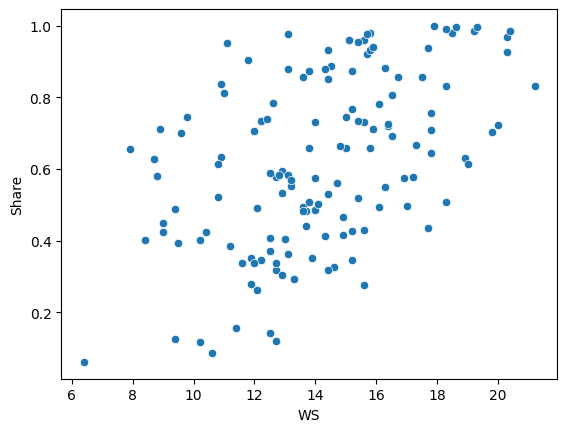

In [9]:
sns.scatterplot(x='WS',y='Share',data=df)

In [10]:
features = ['Age', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'FT%', 'WS', 'YR']
target = 'Share'

X = df.drop(['Share', 'Age', 'G', 'MP', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'FG%', 'FT%', 'YR'], axis=1)
y = df[target]

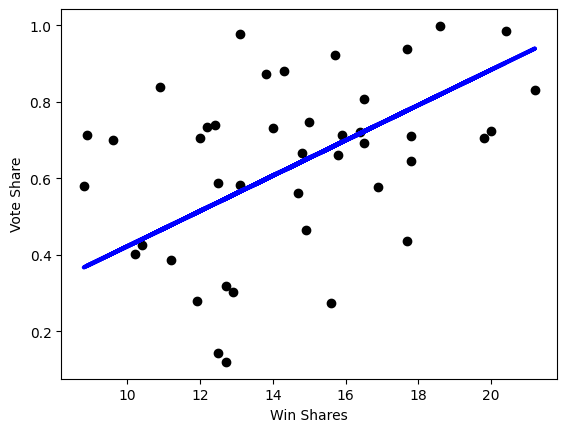

In [11]:
"""
Creating a linear model with train/test split and plotting Vote Share as a function of Win Shares
"""

X_tr_sw, X_te_sw, y_tr_sw, y_te_sw = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()

model.fit(X_tr_sw, y_tr_sw)

predictions = model.predict(X_te_sw)

plt.scatter(X_te_sw, y_te_sw, color='black')
plt.plot(X_te_sw, predictions, color="blue", linewidth=3)
plt.ylabel('Vote Share')
plt.xlabel('Win Shares')
plt.show()

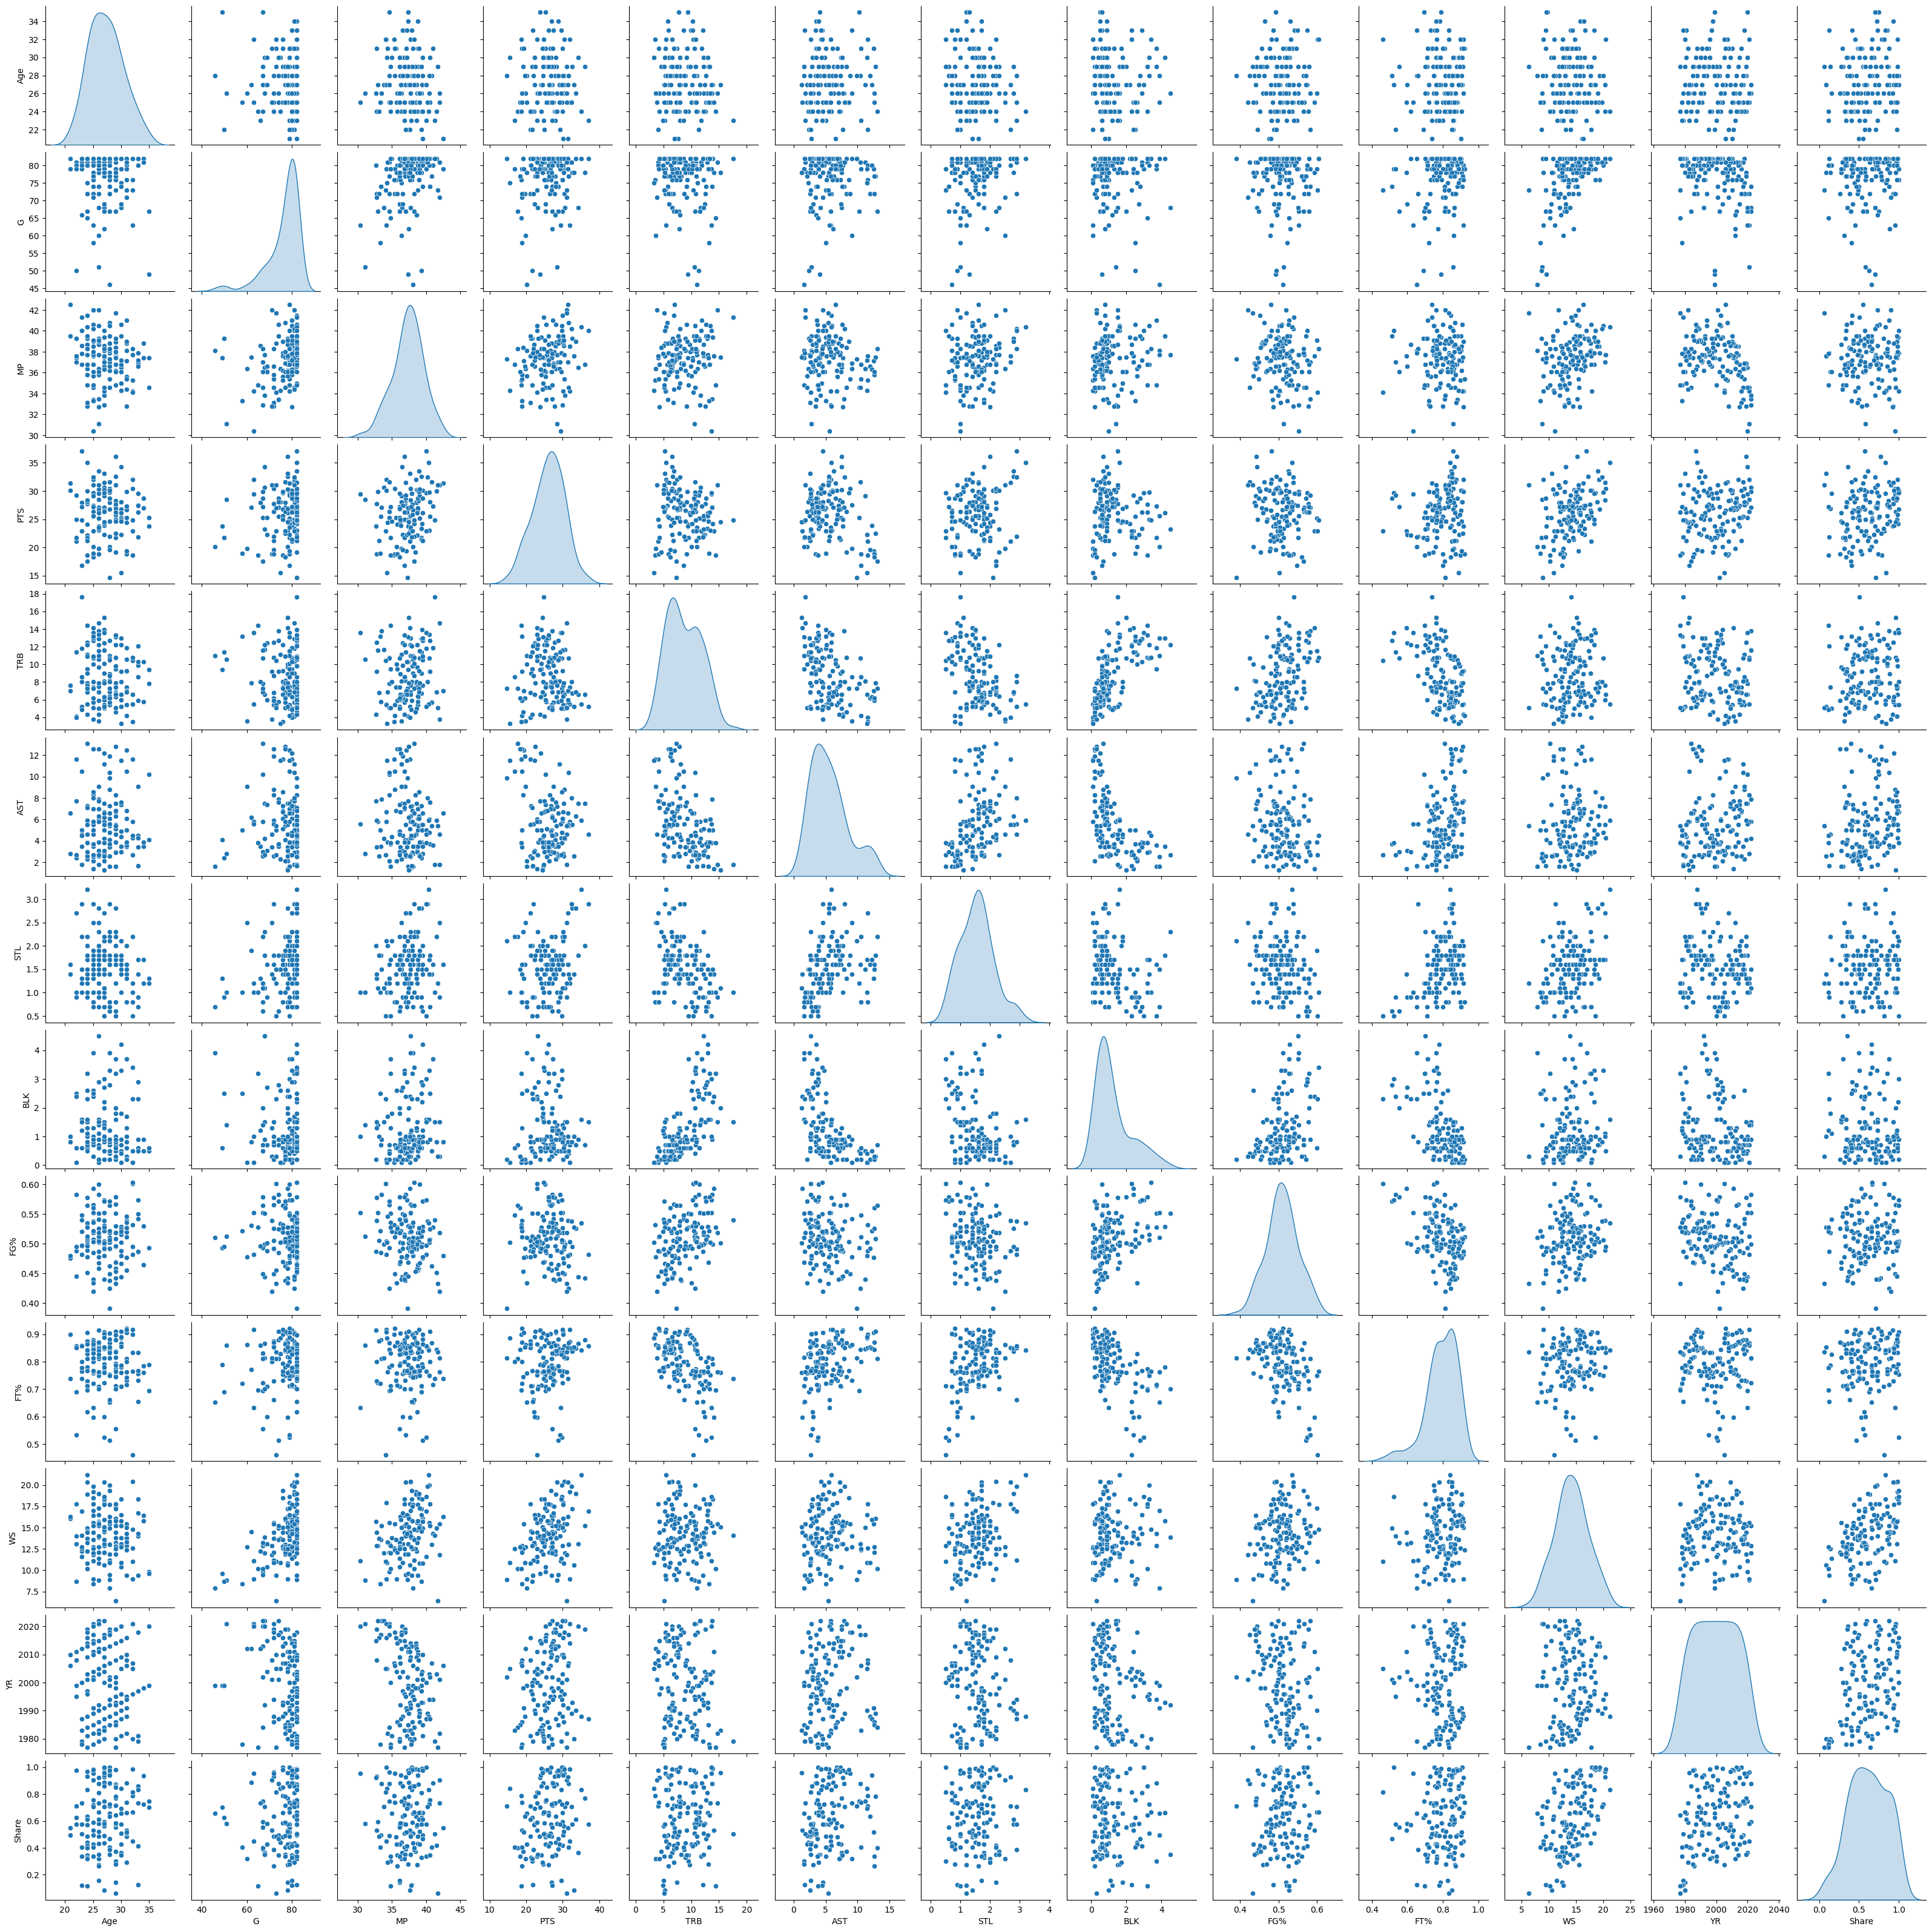

In [12]:
sns.pairplot(data=df, diag_kind='kde')

### Multicolinearity 

We must analyze whether two or more independent variables in the regression model are correlated with one another. In the presence of multicolinearity, the regression coefficients may be unstable. If this is the case, other methods of regression, such as ridge or principal component regressions are indicated.  

<AxesSubplot: xlabel='1', ylabel='1'>

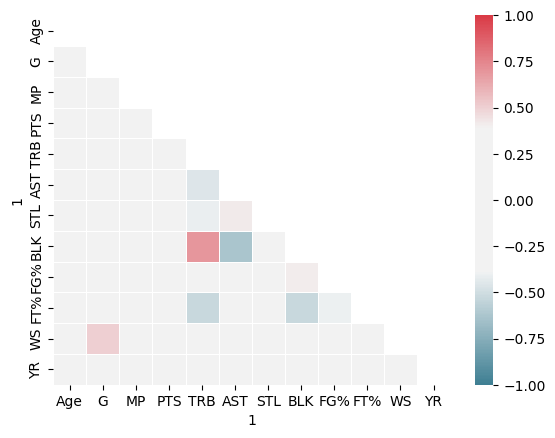

In [13]:
"""
Using Pandas' Spearman correlation method to visualize which of the features are correlated for feature engineering
"""


corr_df = df.iloc[:, 0:-1]
corr = corr_df.corr(method='spearman')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

### Full model and feature importance

feature importance calculated by permutation

In [14]:
X = df.drop('Share',axis=1)
y = df['Share'] # target

X_tr, X_te, y_tr, y_te = train_test_split(X, y, train_size=0.3, random_state=99)

model = LinearRegression()

In [15]:
model.fit(X_tr, y_tr)

print(f'model score on training data: {model.score(X_tr, y_tr)}')
print(f'model score on testing data: {model.score(X_te, y_te)}')

model score on training data: 0.7442252267886448
model score on testing data: -0.5947242685347864


[ 1.19099474e-02  1.78510466e-03 -5.63250666e-02  2.46644407e-02
  4.42011638e-02  3.58364203e-02  2.04266873e-02 -7.49087611e-02
 -1.31358893e+00 -4.43349646e-01  5.58552452e-02  8.00940569e-04]


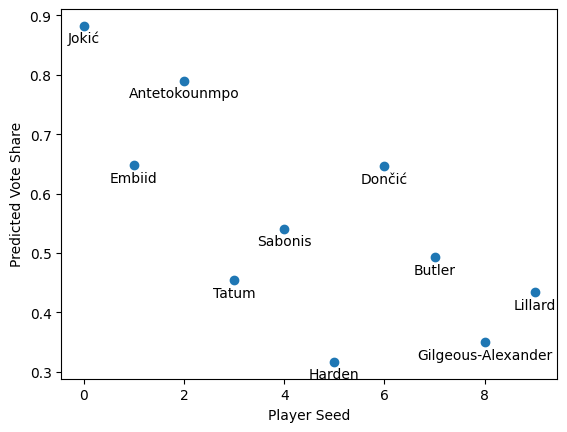

In [16]:
"""
Pulling data from Basketball Reference, adding Win Shares statistic, and using model coefficients and intercept to create predictions
"""


csv_string = """Rk,Player,Team,W,L,W/L%,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,,Prob%
1,Nikola Jokić,DEN,52,29,.642,69,69,33.7,9.4,14.8,.632,0.8,2.2,.383,8.5,12.7,.675,.660,4.9,6.0,.822,2.4,9.4,11.8,9.8,1.3,0.7,3.6,2.5,24.5,,56.5%
2,Joel Embiid,PHI,53,28,.654,66,66,34.6,11.0,20.1,.548,1.0,3.0,.330,10.0,17.1,.587,.573,10.0,11.7,.857,1.7,8.4,10.2,4.2,1.0,1.7,3.4,3.1,33.1,,14.9%
3,Giannis Antetokounmpo,MIL,58,23,.716,63,63,32.1,11.2,20.3,.553,0.7,2.7,.275,10.5,17.6,.596,.572,7.9,12.3,.645,2.2,9.6,11.8,5.7,0.8,0.8,3.9,3.1,31.1,,9.9%
4,Jayson Tatum,BOS,56,25,.691,74,74,36.9,9.8,21.1,.466,3.2,9.3,.350,6.6,11.8,.558,.543,7.2,8.4,.854,1.1,7.7,8.8,4.6,1.1,0.7,2.9,2.2,30.1,,4.5%
5,Domantas Sabonis,SAC,48,33,.593,78,78,34.8,7.3,11.9,.615,0.4,1.1,.373,6.9,10.8,.638,.631,4.1,5.6,.743,3.2,9.2,12.4,7.3,0.8,0.5,2.9,3.6,19.2,,3.6%
6,James Harden,PHI,53,28,.654,58,58,36.8,6.4,14.5,.441,2.8,7.2,.385,3.6,7.3,.495,.536,5.4,6.2,.867,0.7,5.4,6.1,10.7,1.2,0.5,3.4,1.9,21.0,,3.5%
7,Luka Dončić,DAL,38,43,.469,66,66,36.2,10.9,22.0,.496,2.8,8.2,.342,8.1,13.8,.588,.560,7.8,10.5,.742,0.8,7.8,8.6,8.0,1.4,0.5,3.6,2.5,32.4,,3.0%
8,Jimmy Butler,MIA,43,38,.531,64,64,33.4,7.5,13.9,.539,0.6,1.6,.350,6.9,12.3,.564,.560,7.4,8.7,.850,2.2,3.7,5.9,5.3,1.8,0.3,1.6,1.3,22.9,,1.8%
9,Shai Gilgeous-Alexander,OKC,39,42,.481,68,68,35.5,10.4,20.3,.510,0.9,2.5,.345,9.5,17.8,.533,.531,9.8,10.9,.905,0.9,4.0,4.8,5.5,1.6,1.0,2.8,2.8,31.4,,1.3%
10,Damian Lillard,POR,33,48,.407,58,58,36.3,9.6,20.7,.463,4.2,11.3,.371,5.4,9.4,.574,.564,8.8,9.6,.914,0.8,4.0,4.8,7.3,0.9,0.3,3.3,1.9,32.2,,0.9%"""



current_votes = get_votes_as_df(csv_string, current=True)
current_votes.columns=current_votes.iloc[0]
current_votes = current_votes.tail(-1)
# order = "age, G, MP, PTS, TRB, AST, STL, BLK, FG%, FT%, WS YR"
# print(len(model.coef_))
# print(len(["age", "G", "MP", "PTS", "TRB", "AST", "STL", "BLK", "FG%", "FT%" ,"WS", "YR"]))
# model.coef_

ws = pd.Series([0, 14.9, 12.3, 8.6, 10.6, 12.4, 8.3, 10.2, 12.3, 11.4, 9.1])
age = pd.Series([0, 28, 29, 28, 25, 26, 33, 24, 33, 24, 32])
stats = current_votes.assign(WS=ws)
stats = stats.assign(Age=age)

stats['Age'] = stats['Age'].astype(int)
stats['G'] = stats['G'].astype(int)
stats['MP'] = stats['MP'].astype(float)
stats['PTS'] = stats['PTS'].astype(float)
stats['TRB'] = stats['TRB'].astype(float)
stats['AST'] = stats['AST'].astype(float)
stats['STL'] = stats['STL'].astype(float)
stats['BLK'] = stats['BLK'].astype(float)
stats['FG%'] = stats['FG%'].astype(float)
stats['FT%'] = stats['FT%'].astype(float)
stats['WS'] = stats['WS'].astype(float)

# assert len(["age", "G", "MP", "PTS", "TRB", "AST", "STL", "BLK", "FG%", "FT%" ,"WS", "YR"]) == len(model.coef_)
coefs = model.coef_
print(coefs)
model.intercept_

# use eFG% instead of FG%

# declare estimated share
eShare = []
# eShare.append(coefs[0] * a['Age'] + coefs[1] * a['G'] + coefs[2] * a['MP'] + coefs[3] * a['PTS'] + coefs[4] * a['TRB'] + coefs[5] * a['AST'] + coefs[6] * a['STL'] + coefs[7] * a['BLK'] + coefs[8] * a['FG%'] + coefs[9] * a['FT%'] + coefs[10] * a['WS'] + coefs[11] * 2023)
# stats
stats.apply(lambda a: eShare.append(coefs[0] * a['Age'] + coefs[1] * a['G'] + coefs[2] * a['MP'] + coefs[3] * a['PTS'] + coefs[4] * a['TRB'] + coefs[5] * a['AST'] + coefs[6] * a['STL'] + coefs[7] * a['BLK'] + coefs[8] * a['FG%'] + coefs[9] * a['FT%'] + coefs[10] * a['WS'] + coefs[11] * 2023 + model.intercept_), axis=1)
stats
xc = np.linspace(0, 9, 10)
plt.scatter(xc, eShare)

players = stats['Player'].to_numpy()

for x,y in zip(xc,eShare):

    label = f"{players[int(x)].split(' ')[1]}"

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-12), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.ylabel('Predicted Vote Share')
plt.xlabel('Player Seed')
plt.show()



In [17]:
def get_score_after_permutation(model, X, y, curr_feat):
    """ return the score of model when curr_feat is permuted """

    X_permuted = X.copy()
    col_idx = list(X.columns).index(curr_feat)
    # permute one column
    X_permuted.iloc[:, col_idx] = np.random.permutation(
        X_permuted[curr_feat].values)

    permuted_score = model.score(X_permuted, y)
    return permuted_score


def get_feature_importance(model, X, y, curr_feat):
    """ compare the score when curr_feat is permuted """

    baseline_score_train = model.score(X, y)
    permuted_score_train = get_score_after_permutation(model, X, y, curr_feat)

    # feature importance is the difference between the two scores
    feature_importance = baseline_score_train - permuted_score_train
    return feature_importance

In [18]:
curr_feat = 'WS'

feature_importance = get_feature_importance(model, X_tr, y_tr, curr_feat)
print(f'feature importance of "{curr_feat}" on train set is '
      f'{feature_importance:.3}')

feature importance of "WS" on train set is 0.922


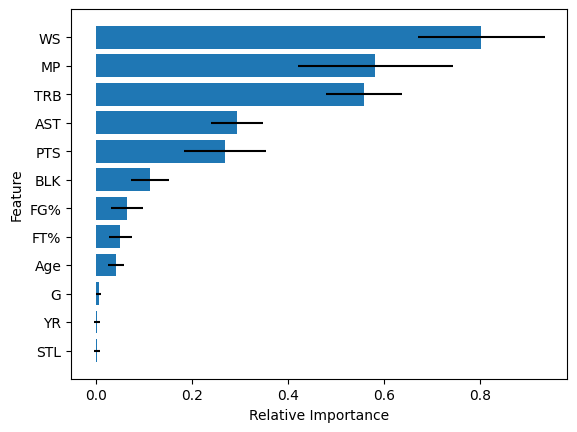

In [19]:
"""
Using permutation method to ascertain feature importance
"""

from sklearn.inspection import permutation_importance

def plot_feature_importances(perm_importance_result, feat_name):
    """ bar plot the feature importance """

    fig, ax = plt.subplots()

    indices = perm_importance_result['importances_mean'].argsort()
    plt.barh(range(len(indices)),
             perm_importance_result['importances_mean'][indices],
             xerr=perm_importance_result['importances_std'][indices])
    plt.ylabel('Feature')
    plt.xlabel('Relative Importance')

    ax.set_yticks(range(len(indices)))
    _ = ax.set_yticklabels(feat_name[indices])

perm_results = permutation_importance_result_train = permutation_importance(
    model, X_tr, y_tr, n_repeats=10)

plot_feature_importances(perm_results, X_tr.columns)

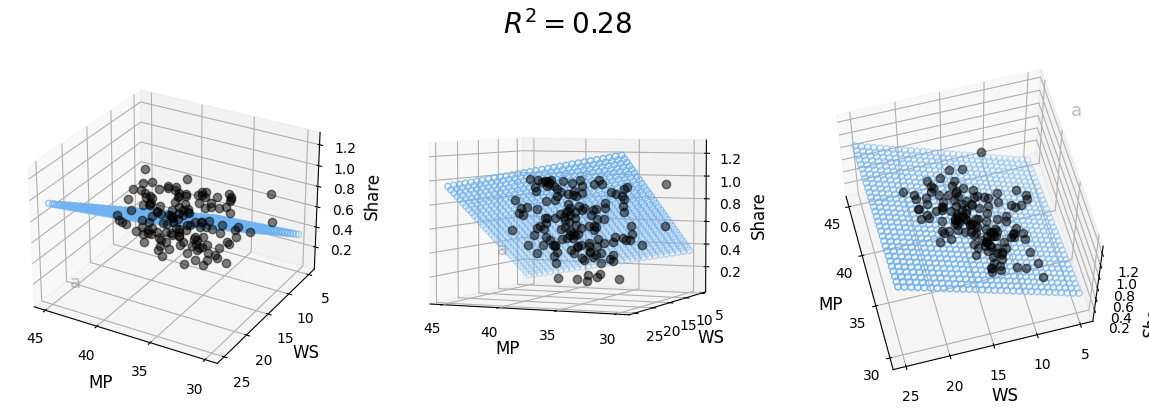

In [20]:
"""
Creating 3D plot based on predictions of two-feature model
"""


X = df[['MP', 'WS']].values.reshape(-1, 2)
Y = df['Share']

x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(30, 45, 30)
y_pred = np.linspace(5, 25, 30)

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

r2 = model.score(X, Y)

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('MP', fontsize=12)
    ax.set_ylabel('WS', fontsize=12)
    ax.set_zlabel('Share', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'a', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'a', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'a', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [21]:
# For logistic Regression:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

start_year = 2022
for idx, df in enumerate(list_of_dataframes): # creating a dataframe with boolean win and year columns
    yr = int(start_year - idx)
    sr = pd.Series(np.repeat([yr], len(df) + 2))
    wins_array = np.repeat([False], len(df) + 2)
    wins_array[2] = True
    ws = pd.Series(wins_array)

    new_df = df.assign(WIN=ws)
    new_df = new_df.assign(YR=sr)

    list_of_dataframes[idx] = new_df


result = pd.concat(list_of_dataframes, axis=0, ignore_index=True)


df = result[[ col for col in result.columns if col != 'Share' ] + ['Share']]

# Converting data types if needed
df['Age'] = df['Age'].astype(int)
df['G'] = df['G'].astype(int)
df['MP'] = df['MP'].astype(float)
df['PTS'] = df['PTS'].astype(float)
df['TRB'] = df['TRB'].astype(float)
df['AST'] = df['AST'].astype(float)
df['STL'] = df['STL'].astype(float)
df['BLK'] = df['BLK'].astype(float)
df['FG%'] = df['FG%'].astype(float)
df['FT%'] = df['FT%'].astype(float)
df['WS'] = df['WS'].astype(float)
df['Share'] = df['Share'].astype(float)
df['WIN'] = df['WIN'].astype(float)

X = df.drop("WIN", axis = "columns") # everything but WIN is independent
y = df.WIN # win is dependent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)  #splitting the data

# We are choosing not to standardize here because we are going to run another model that will predict Share using one variable
logreg = LogisticRegression(penalty = 'none', solver='lbfgs', max_iter=10000) # creating logistic regression model
logreg.fit(X_train, y_train) # fitting the model to the training data

predictions = logreg.predict(X_test) # getting predictions of win or loss
predicted_probabilities = logreg.predict_proba(X_test) # getting probability of win or loss

print(predictions) # 0 means they are predicted not to win, 1 means they are predicted to win
print(predicted_probabilities) # First column is probability of them losing, second column is probability of them winning

log_coefficients = pd.DataFrame({'variables': X.columns.values, 
                         'coefficients': logreg.coef_[0]})

log_coefficients # to visualize the coefficients
# Free throw percentage has a very high coefficient for some reason. Obviously share would, but why FT%?
# Lets run another free logistic regression to find out   

[0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,variables,coefficients
0,Age,1197.822962
1,G,214.917596
2,MP,-205.620422
3,PTS,507.620182
4,TRB,385.692808
5,AST,-672.351511
6,STL,2573.485057
7,BLK,-131.631421
8,FG%,-4203.856344
9,FT%,3882.982586


/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


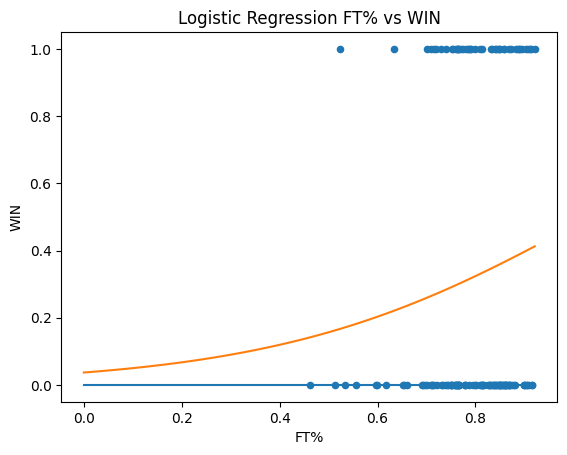

In [22]:
logreg_ft = LogisticRegression(penalty = 'none', solver='lbfgs', max_iter=10000) #creating instance
X_train_ft_column = X_train.loc[:,["FT%"]] # just Share column
X_test_ft_column = X_test.loc[:,["FT%"]] # just Share column
logreg_ft.fit(X_train_ft_column, y_train) # fit the model to the training data

# Scatter plot of free-throw % vs WIN
df.plot(x = "FT%", y = "WIN", kind = "scatter")
plt.title("Logistic Regression FT% vs WIN")

x_grid=np.reshape(np.linspace(0,X_test_ft_column.max()),(-1,1)) #getting limits for x-axis (could also be done like so: np.reshape(np.linspace(0,X_test_amountColumn.max()),(-1,1)))
y_pred_logreg_ft=logreg_ft.predict(x_grid)  #class prediction
y_predProb_logreg_ft=logreg_ft.predict_proba(x_grid)  #predicted probability of a positive outcome (matrix with two columns: column 0 is 0 and column 1 is 1)
sns.lineplot(x = x_grid[:,0],y = y_pred_logreg_ft) #plotting class prediction line (blue)
sns.lineplot(x = x_grid[:,0],y = y_predProb_logreg_ft[:,1])  #plotting predicted probabilty of positive outcome (win) line (orange)
plt.show()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


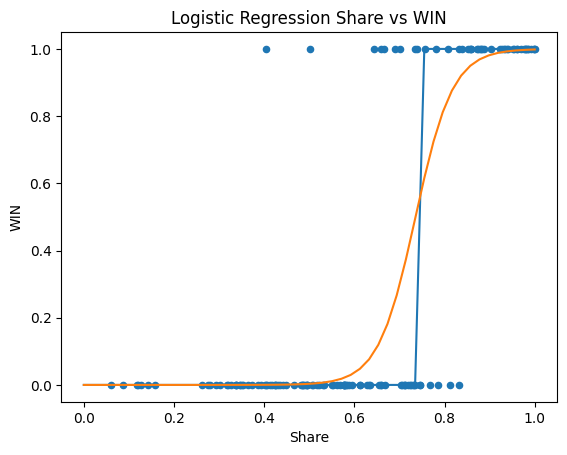

In [23]:
logreg_ft = LogisticRegression(penalty = 'none', solver='lbfgs', max_iter=10000) #creating instance
X_train_ft_column = X_train.loc[:,["Share"]] # just Share column
X_test_ft_column = X_test.loc[:,["Share"]] # just Share column
logreg_ft.fit(X_train_ft_column, y_train) # fit the training data

# Plotting a scatter plot of Share vs WIN
df.plot(x = "Share", y = "WIN", kind = "scatter")
plt.title("Logistic Regression Share vs WIN")


x_grid=np.reshape(np.linspace(0,X_test_ft_column.max()),(-1,1)) #getting limits for x-axis (could also be done like so: np.reshape(np.linspace(0,X_test_amountColumn.max()),(-1,1)))
y_pred_logreg_ft=logreg_ft.predict(x_grid)  #class prediction
y_predProb_logreg_ft=logreg_ft.predict_proba(x_grid)  #predicted probability of a positive outcome (matrix with two columns: column 0 is 0 and column 1 is 1)
sns.lineplot(x = x_grid[:,0],y = y_pred_logreg_ft) #plotting class prediction line (blue)
sns.lineplot(x = x_grid[:,0],y = y_predProb_logreg_ft[:,1])  #plotting predicted probabilty of positive outcome (win) line (orange)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=be3fc7b6-33e0-4d3e-bab5-a9d10bffa6b0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>